[1] "/Volumes/16GB/BS_scripts_clase/ODEstocasticas"

grind.R was sourced
  R   N 
0.5 0.5 
Stable point, eigenvalues:  -0.25+0.4330127i -0.25-0.4330127i 


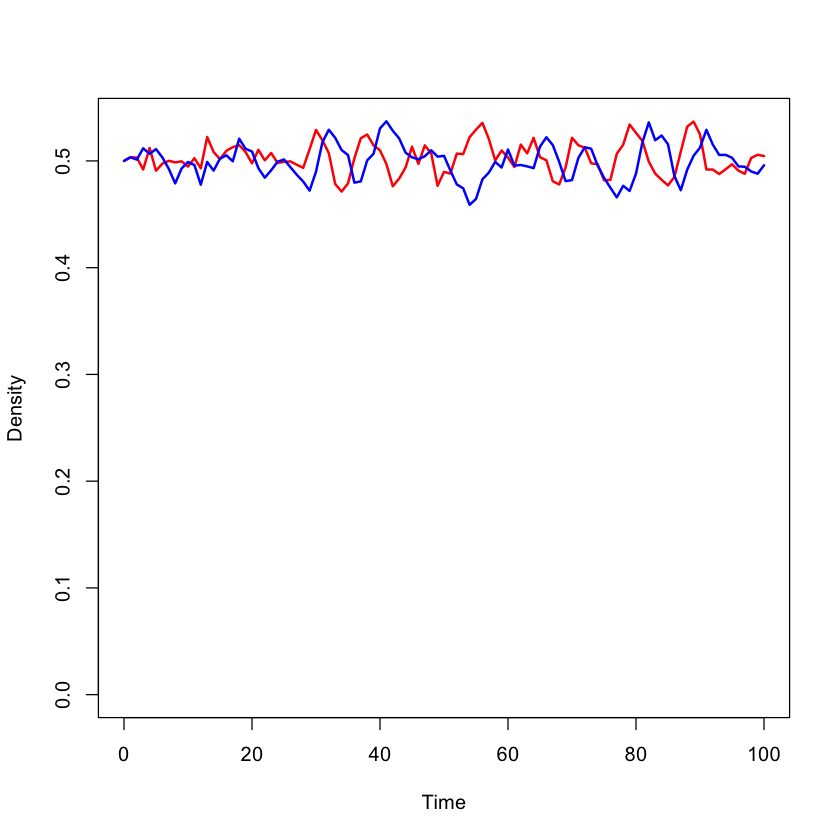

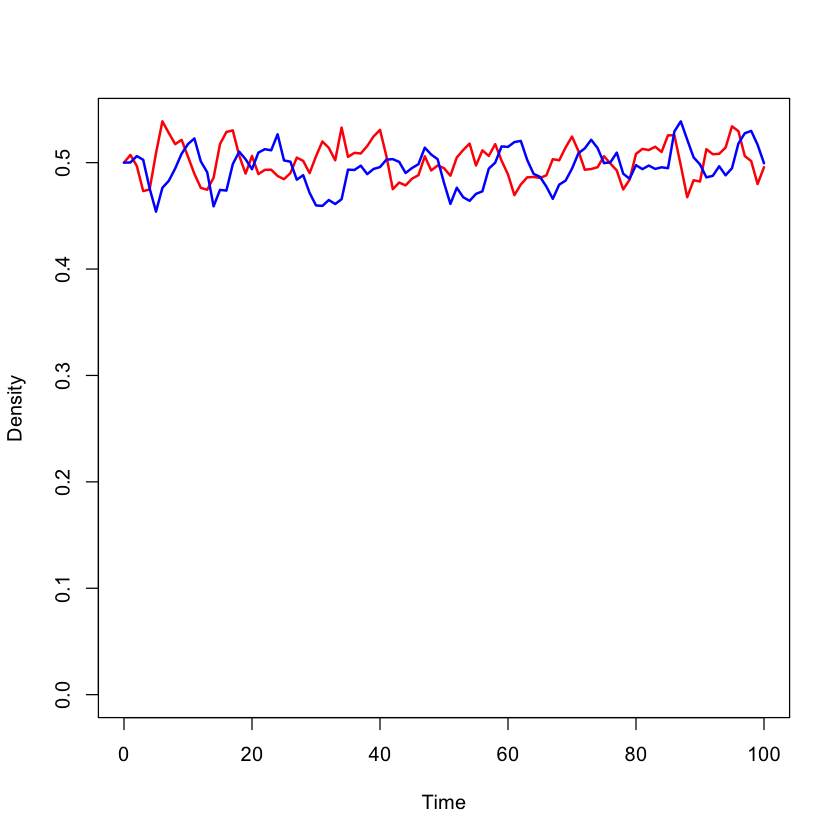

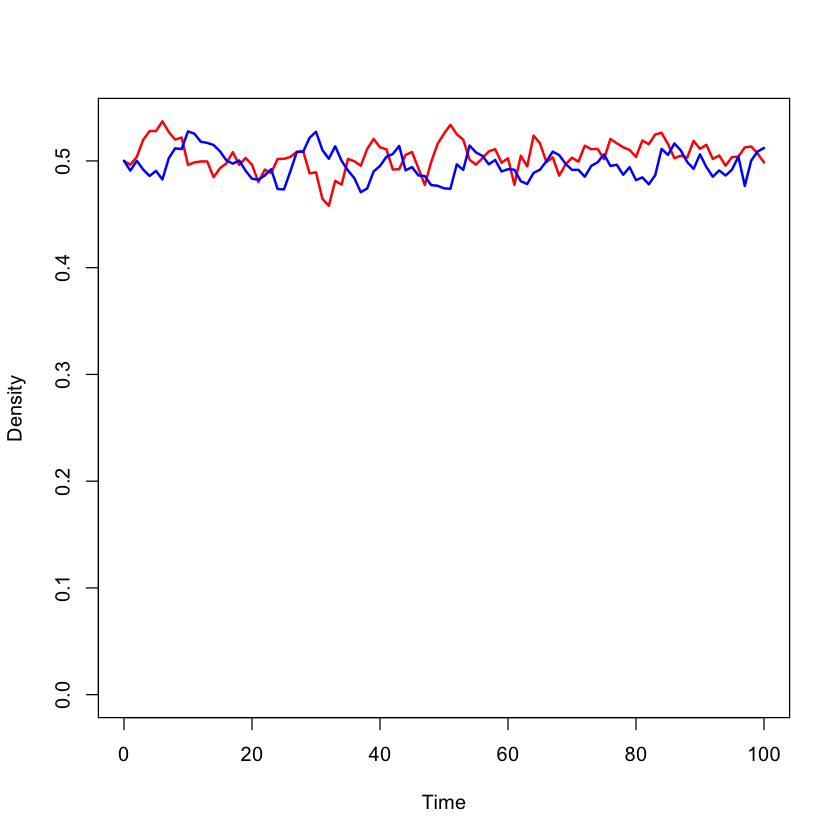

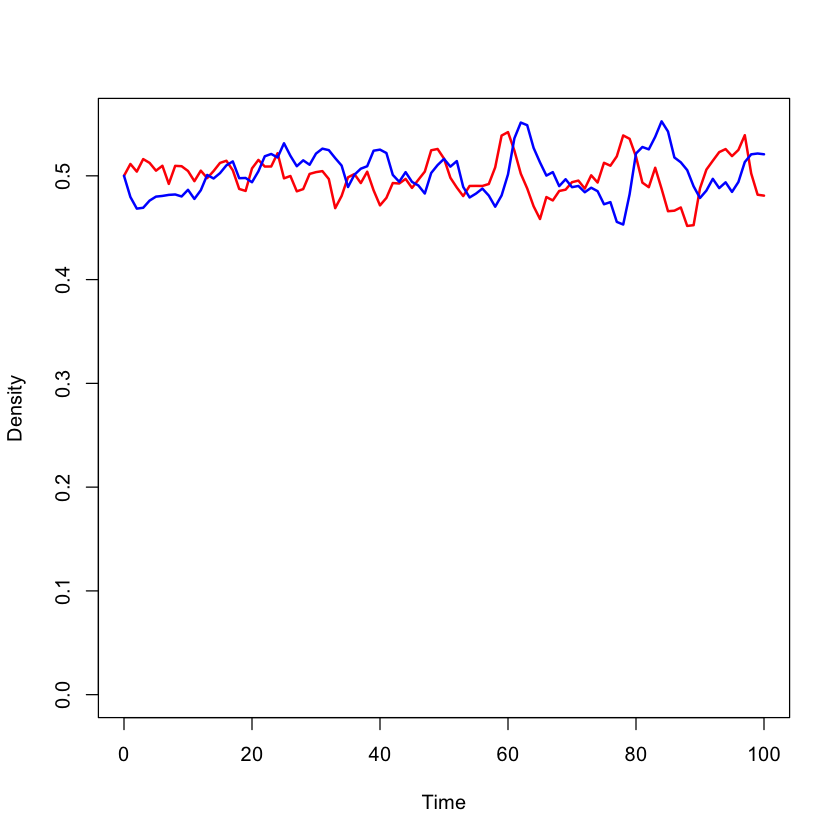

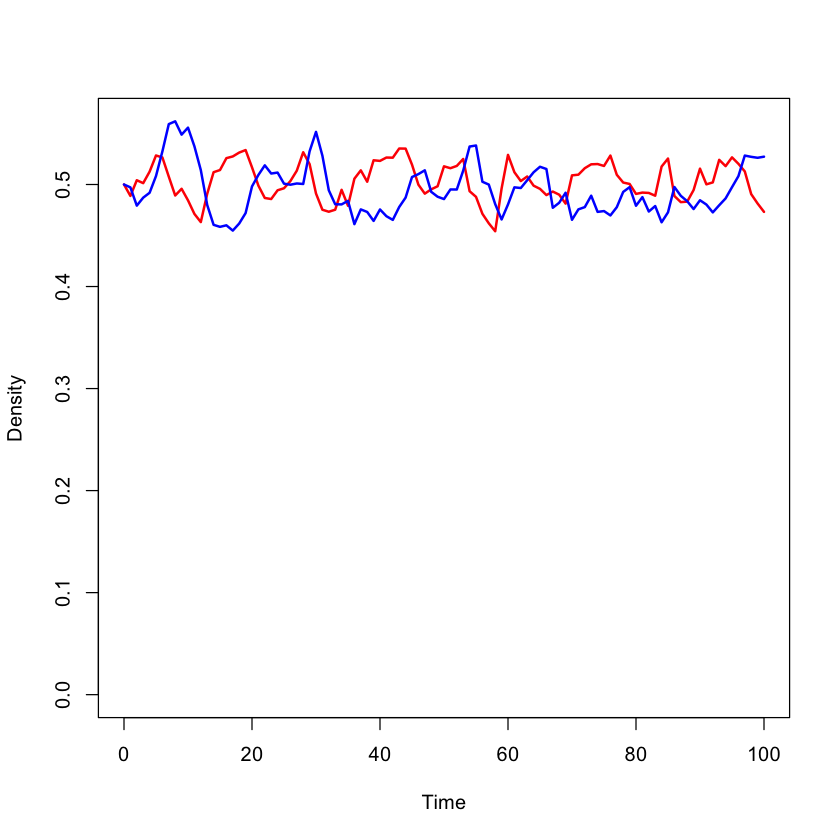

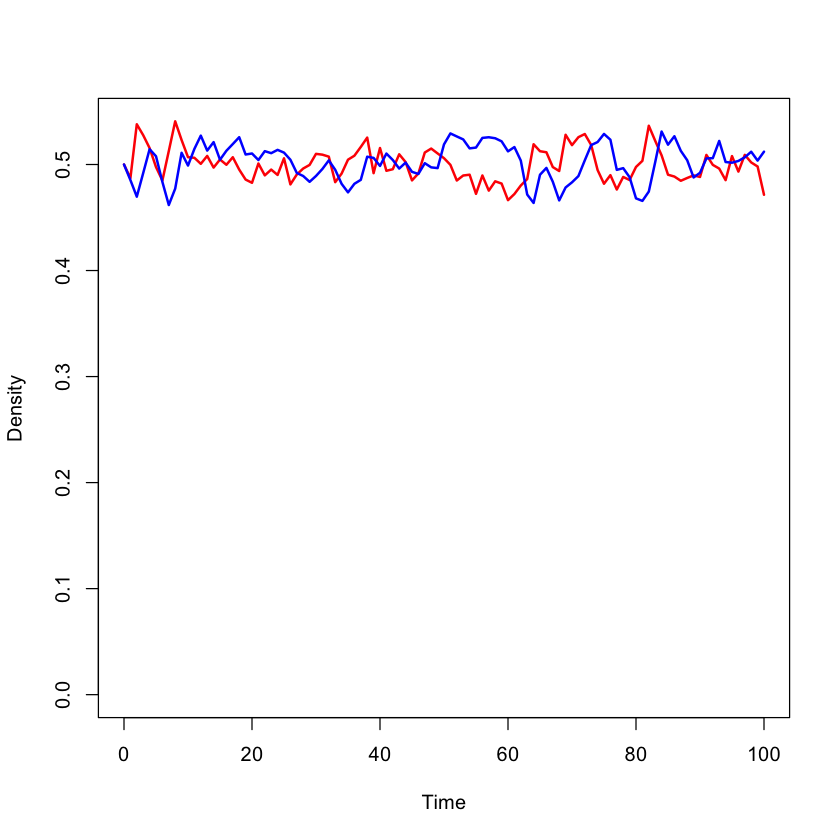

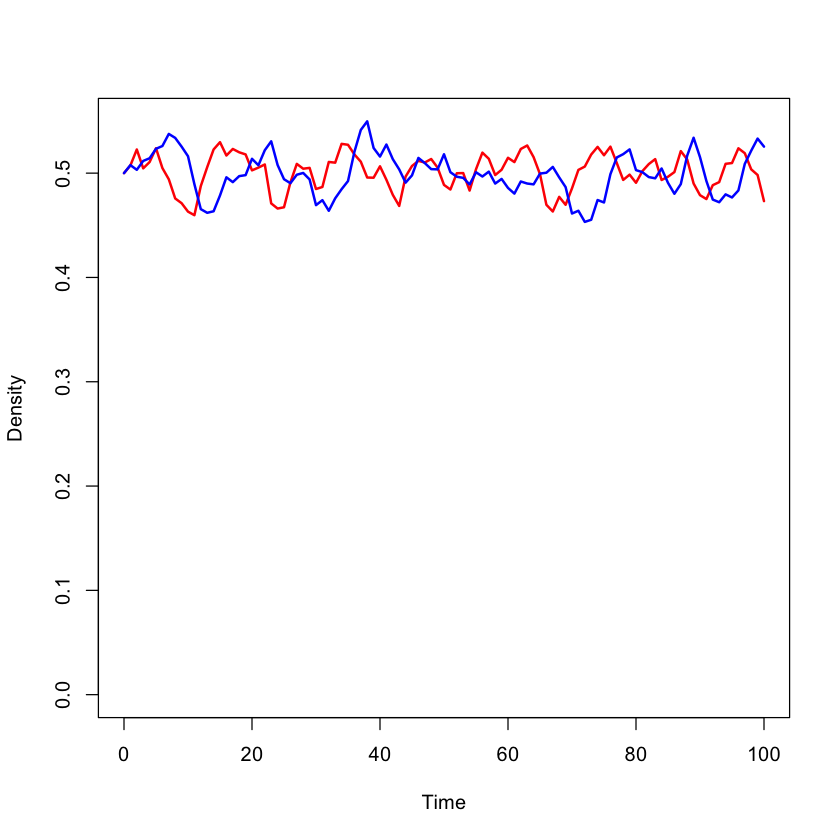

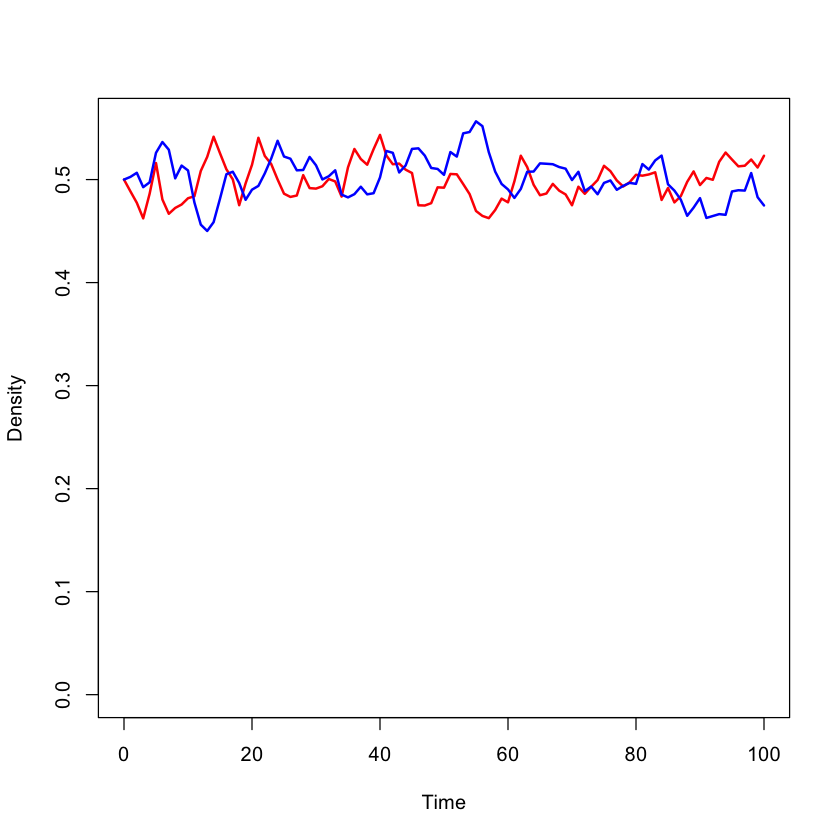

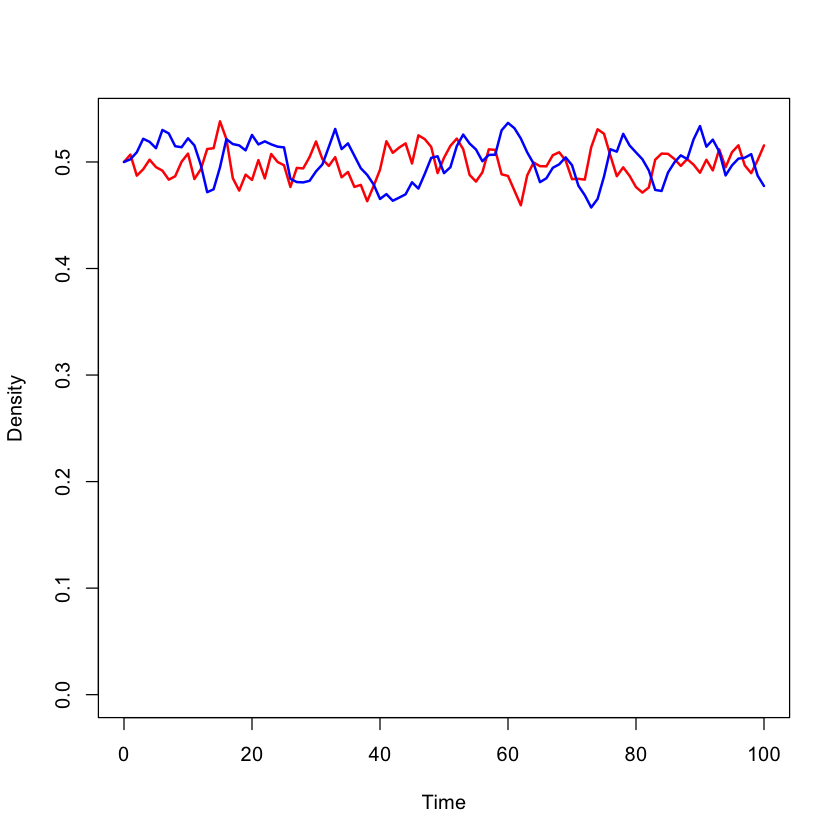

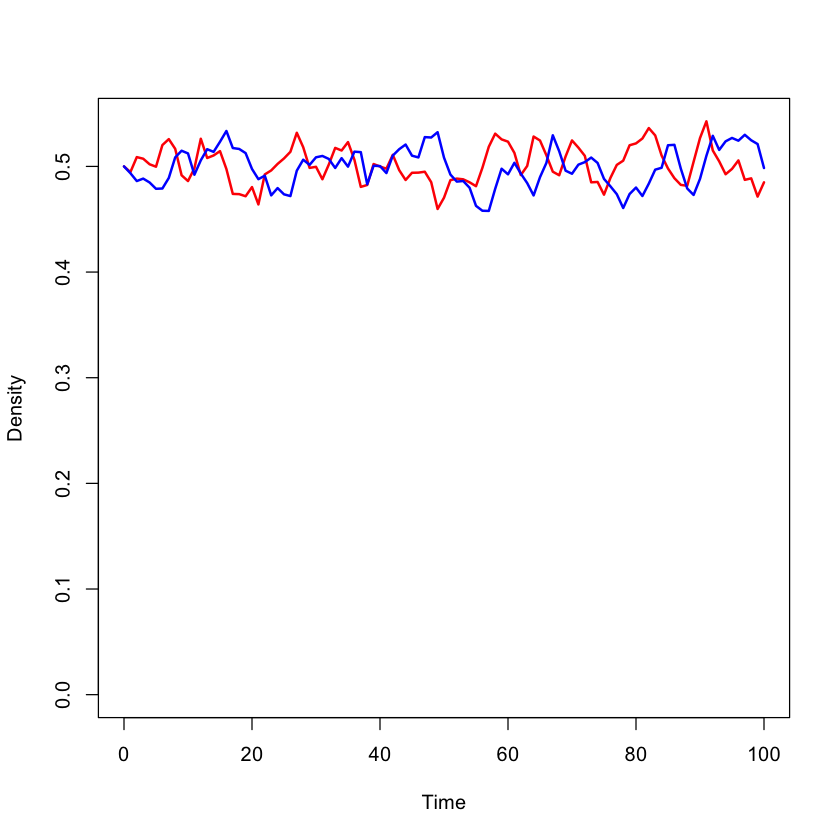

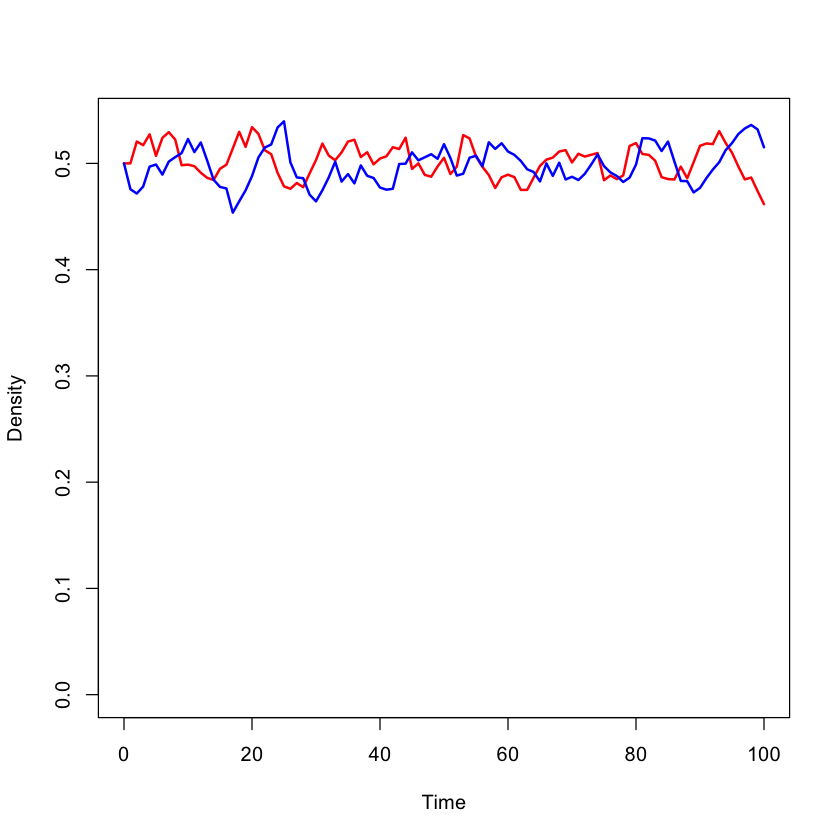

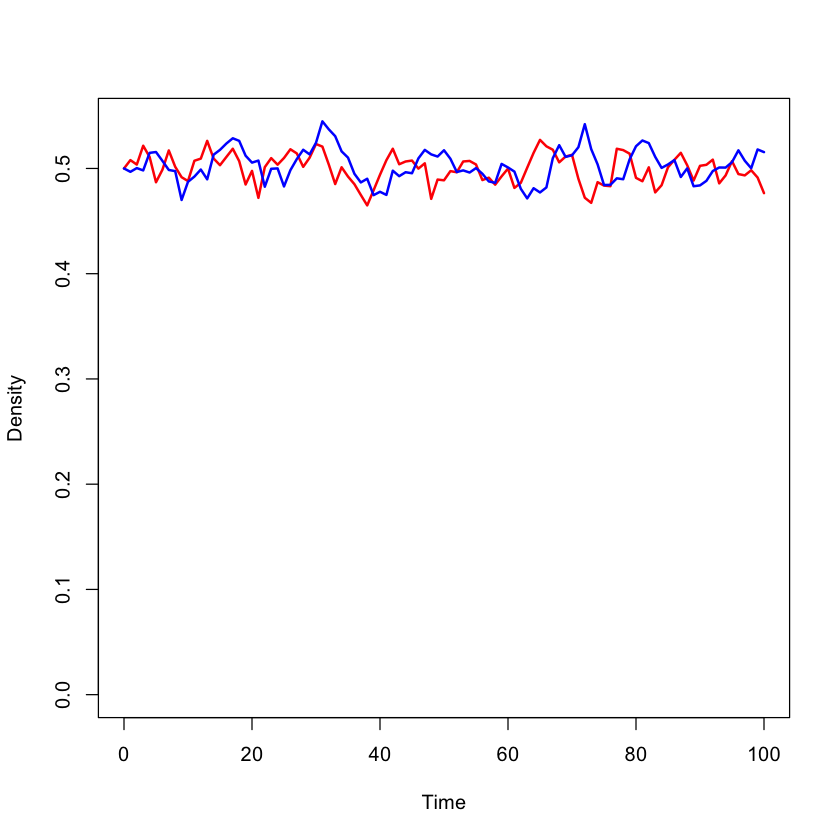

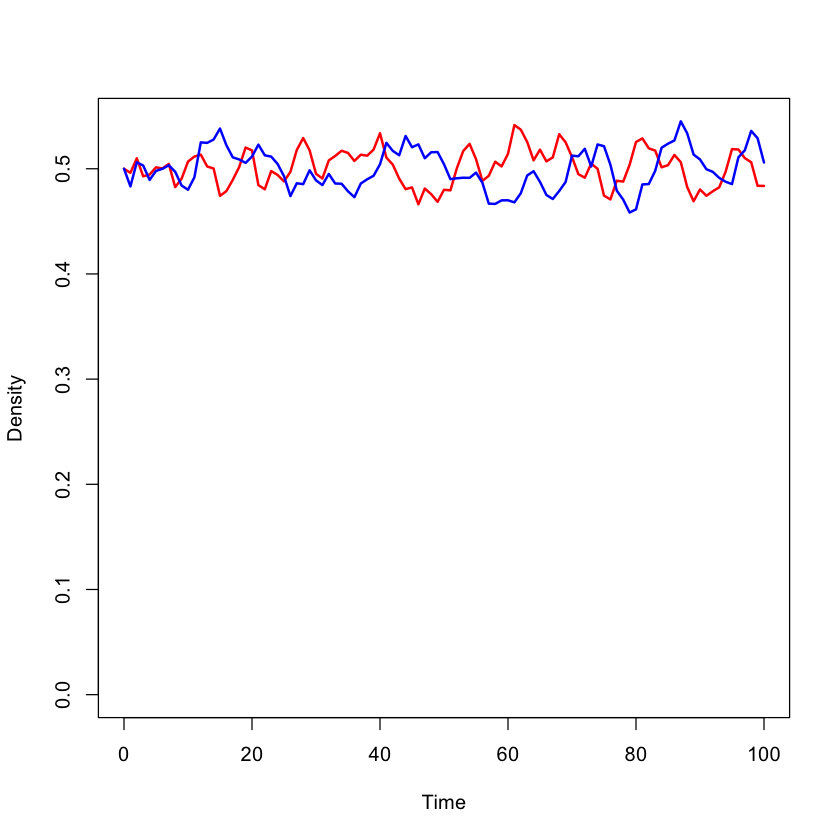

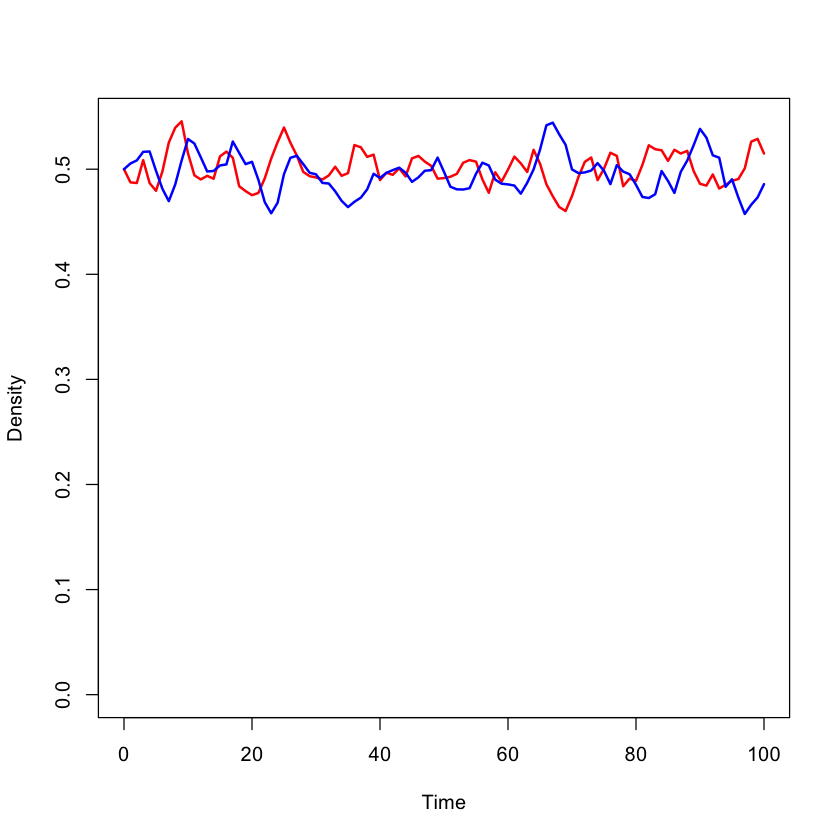

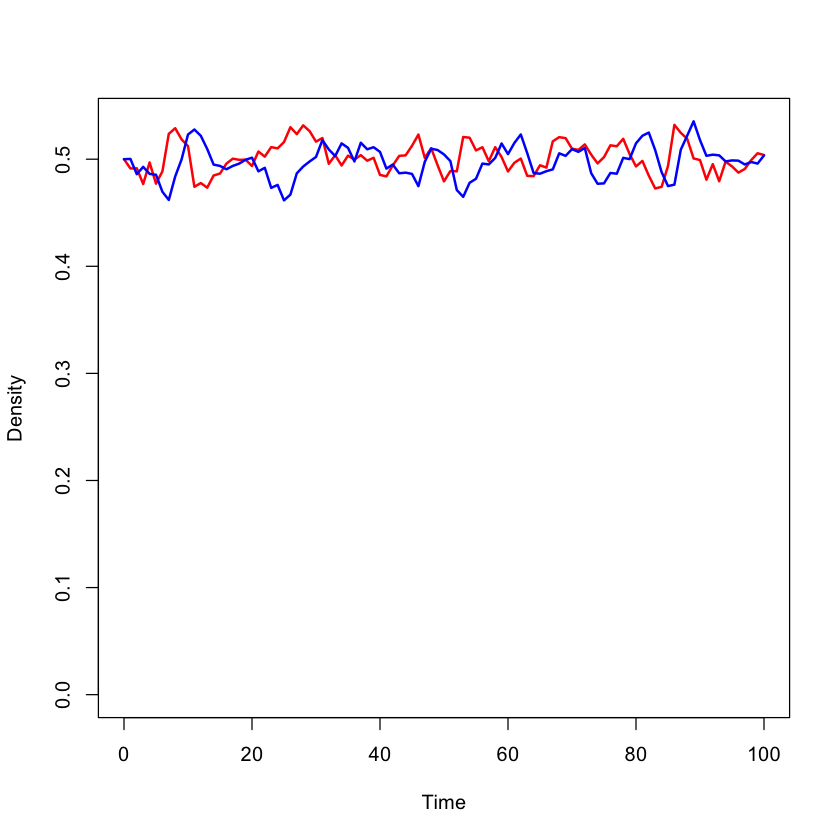

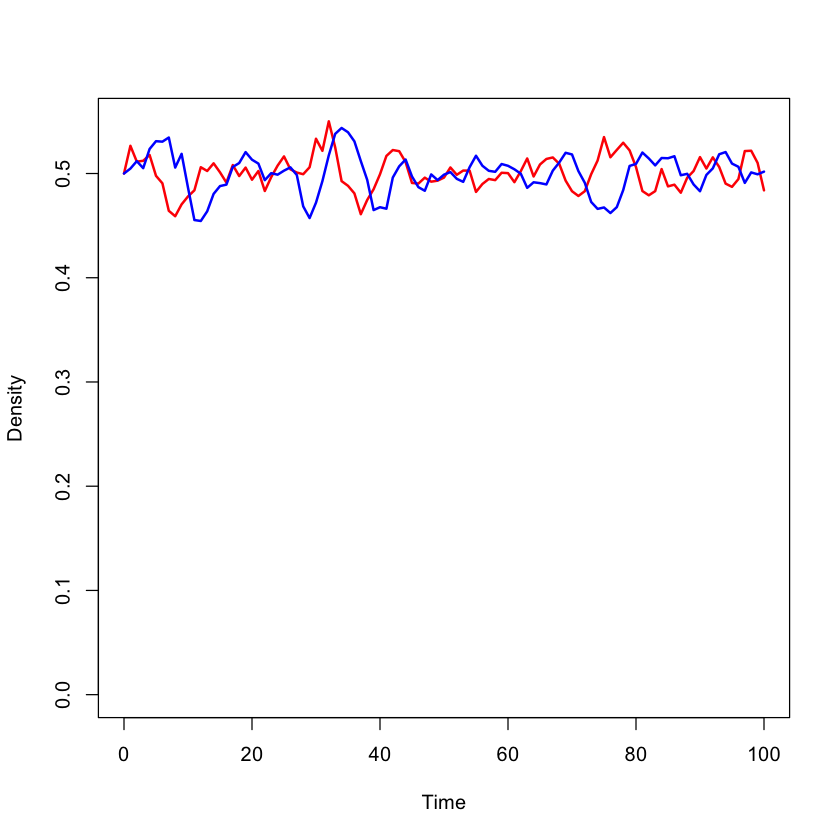

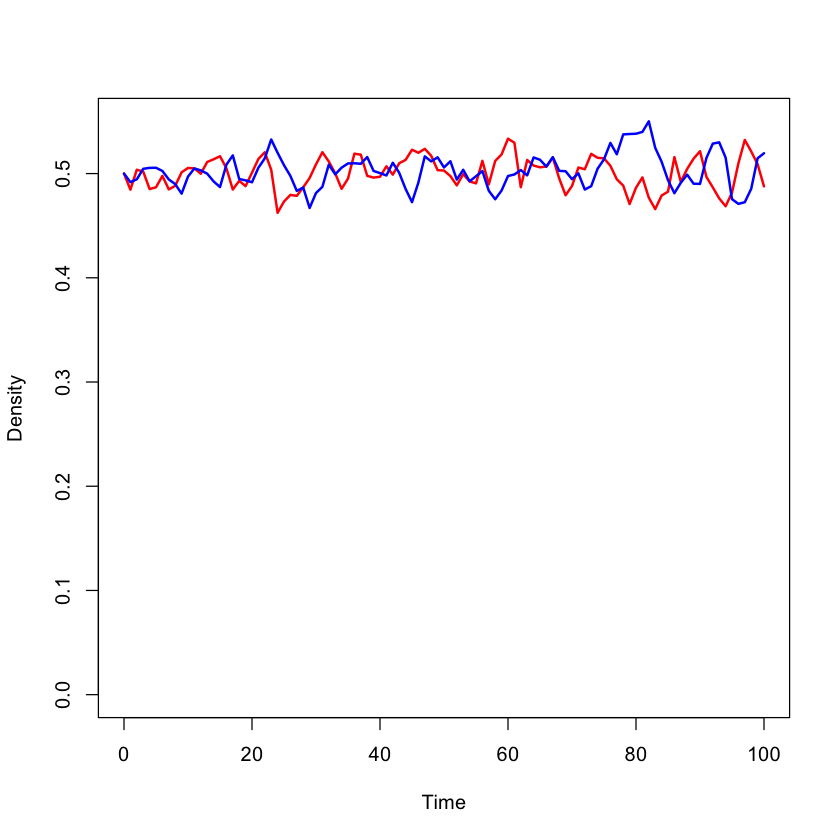

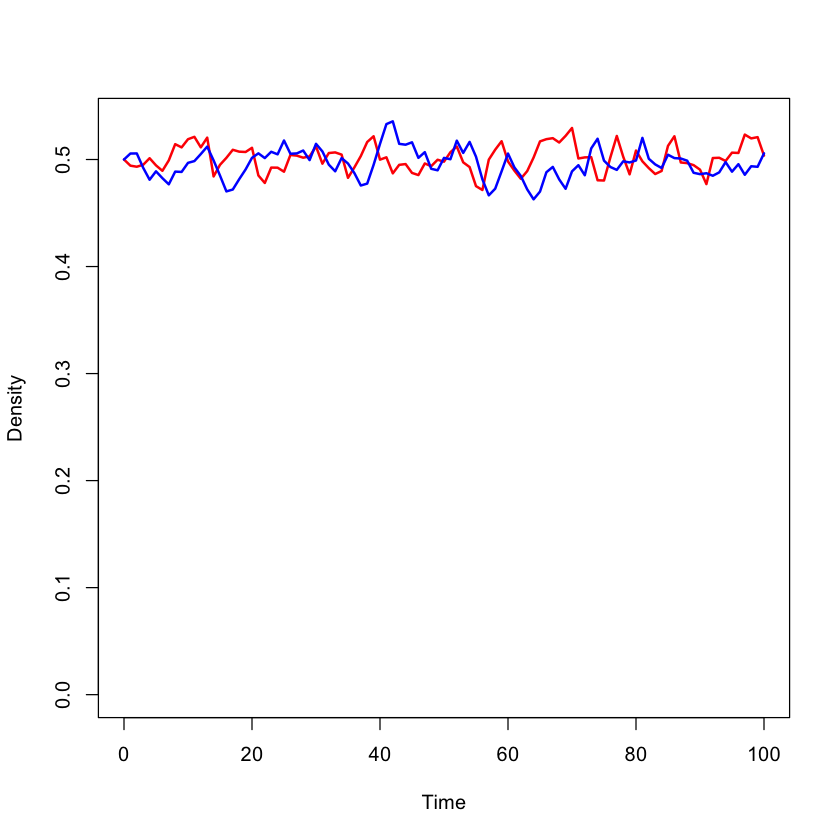

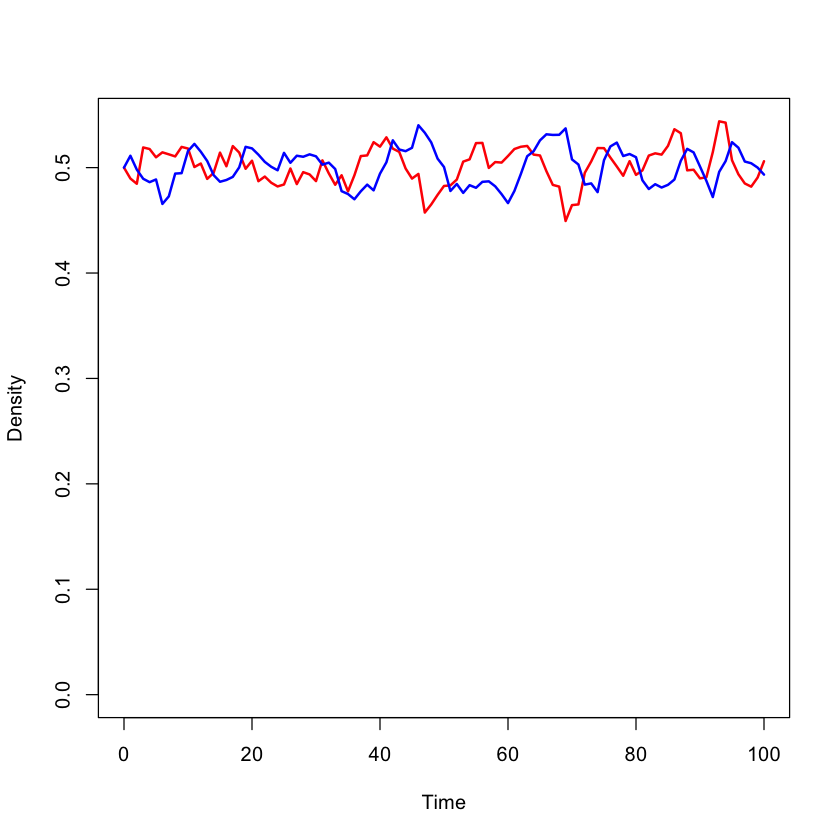

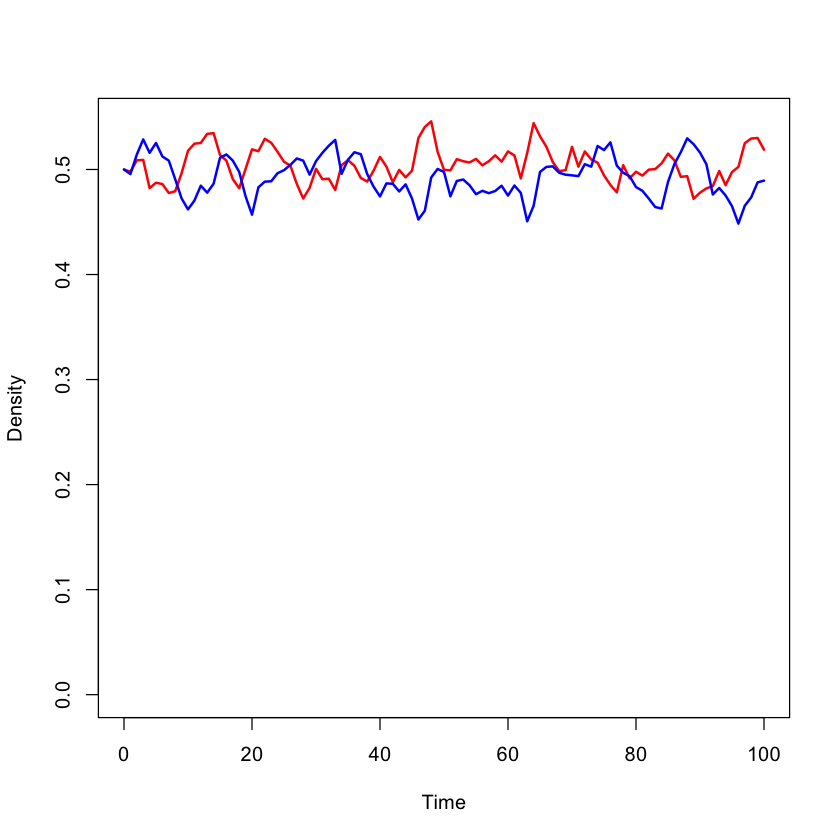

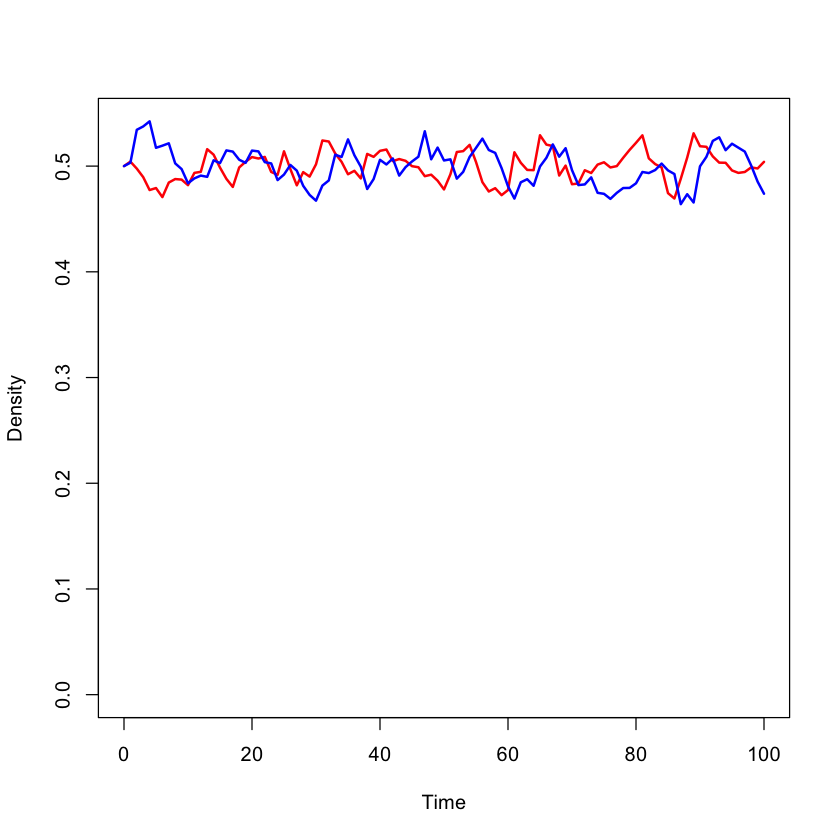

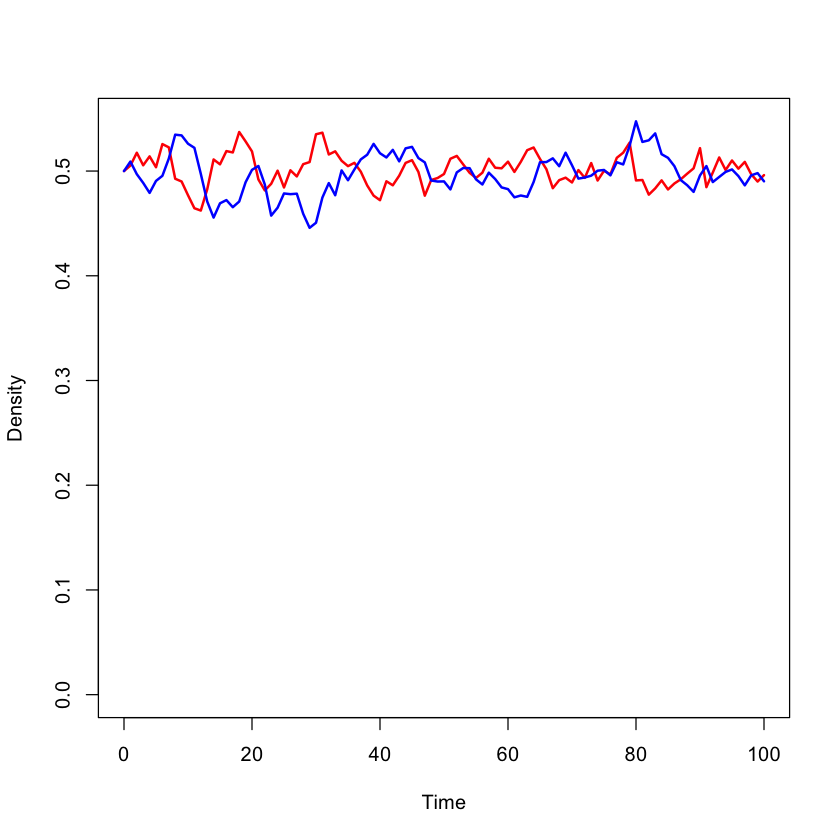

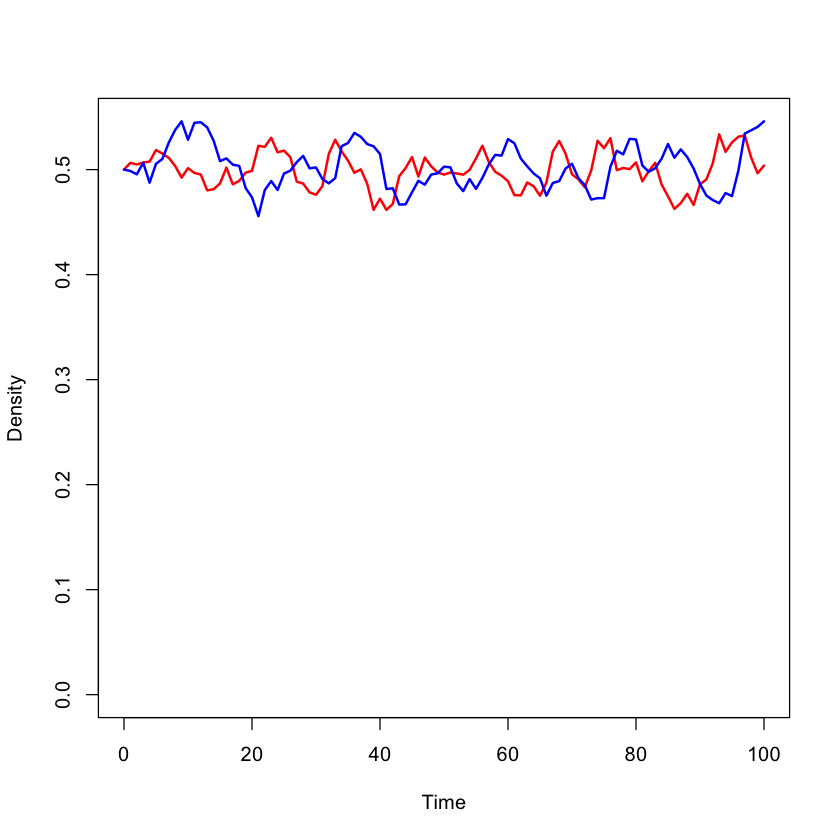

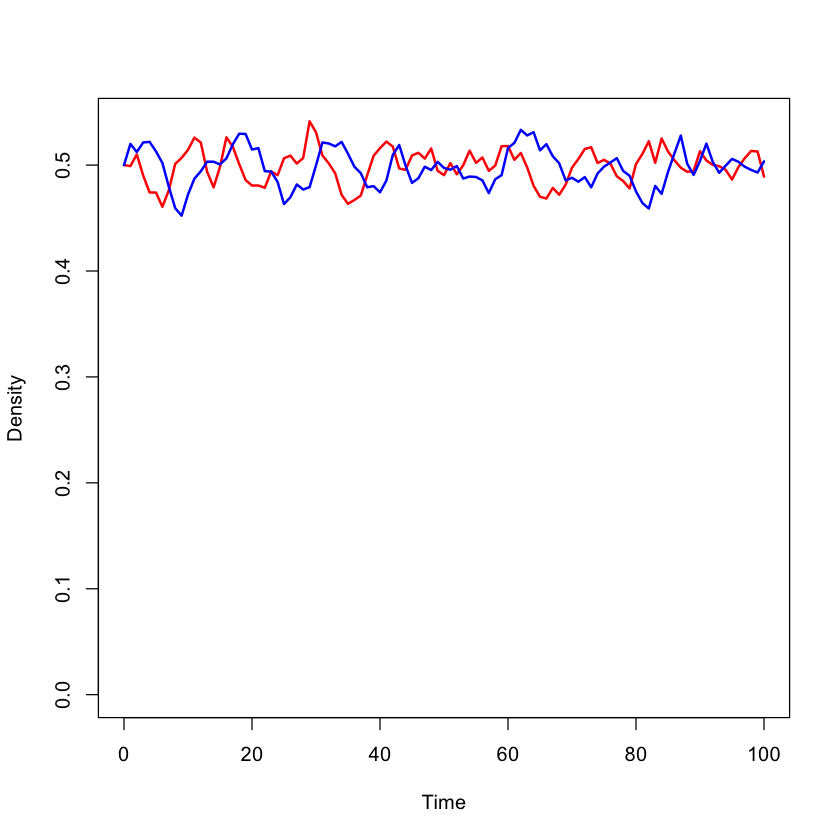

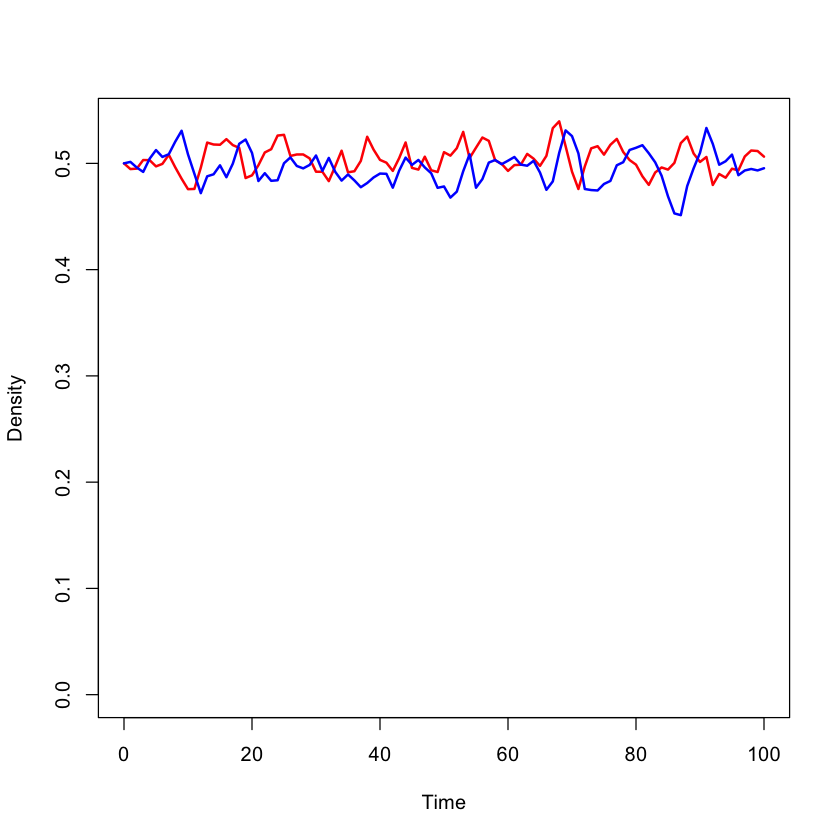

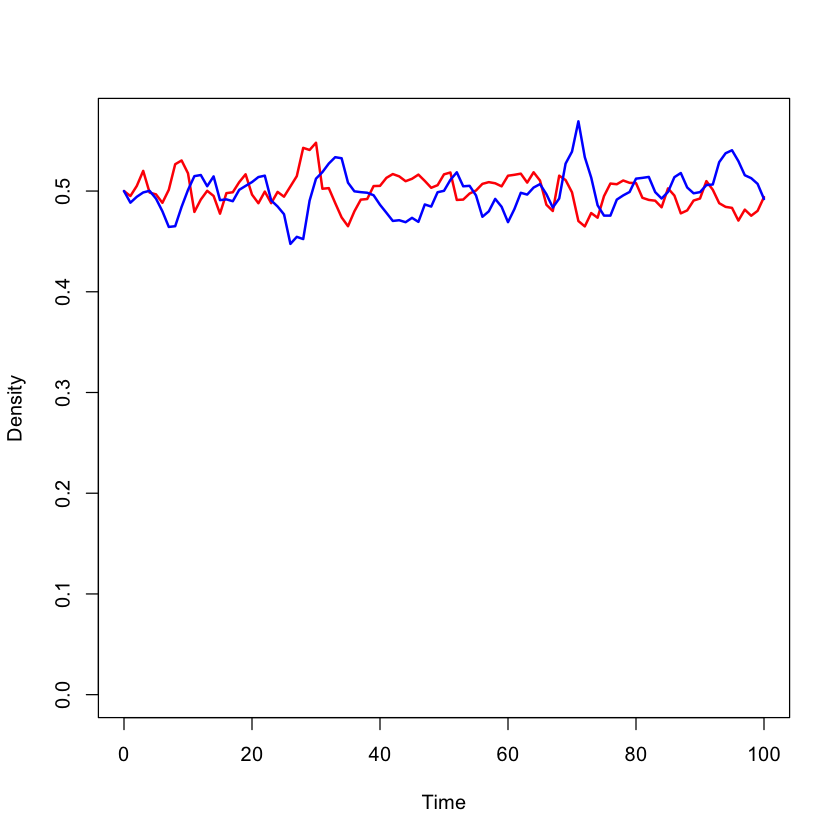

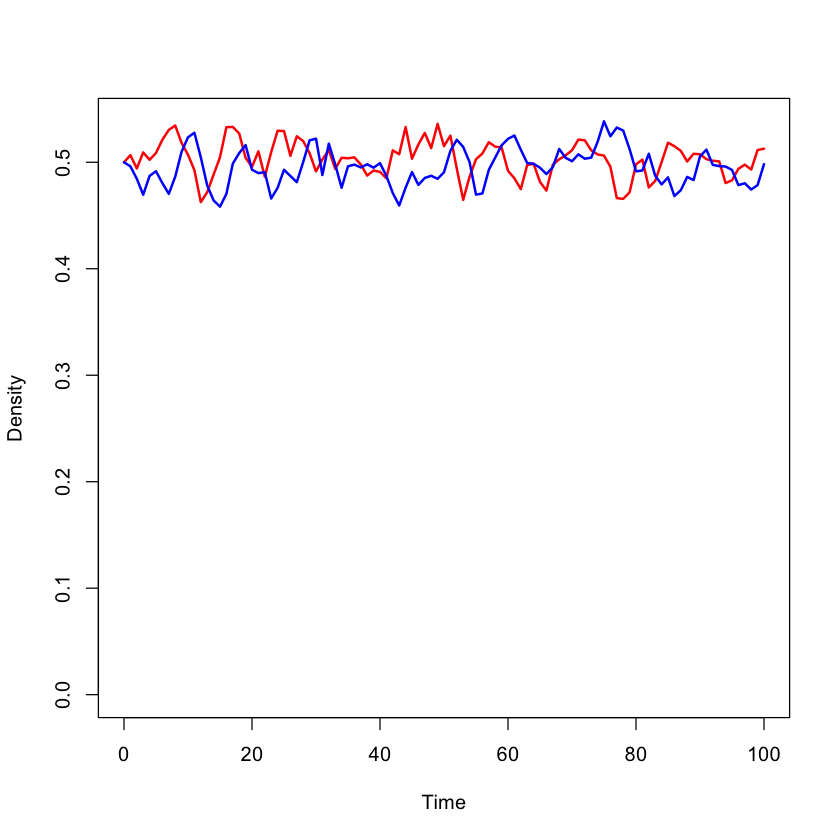

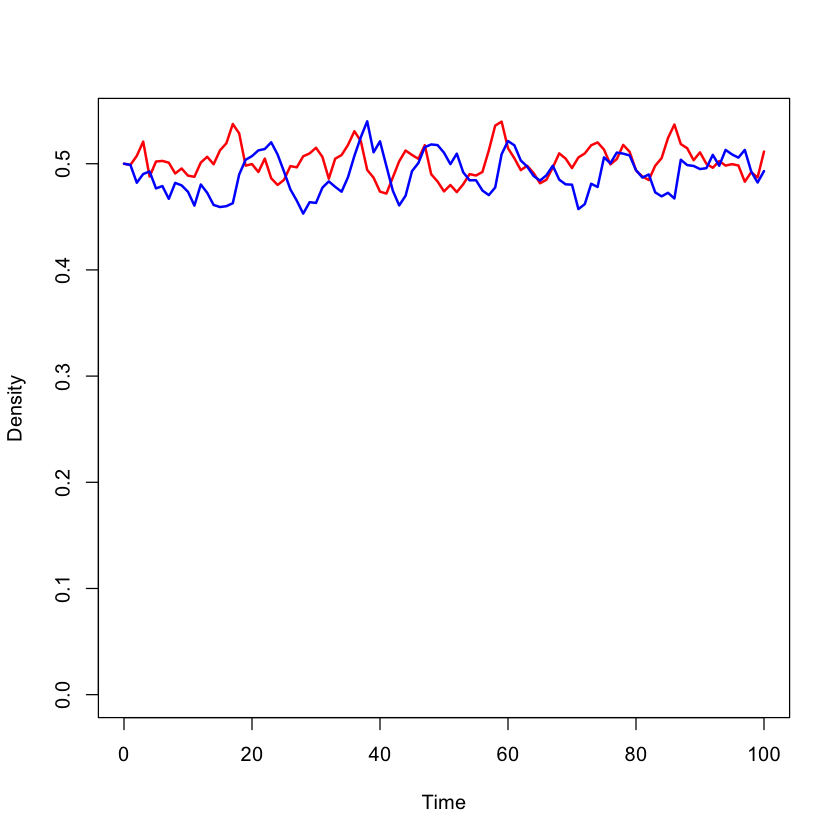

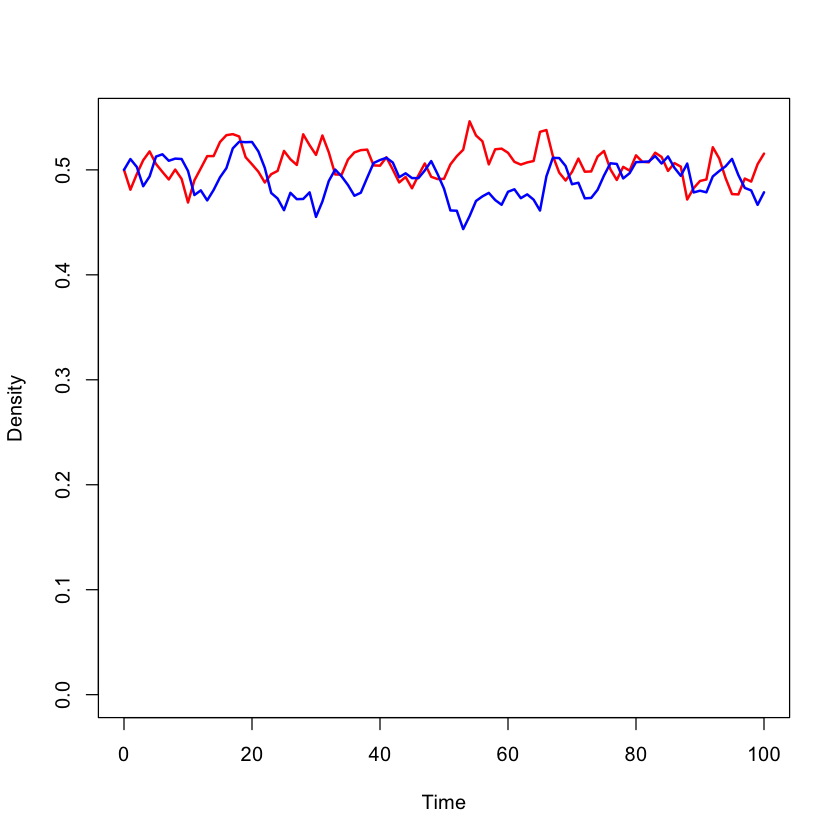

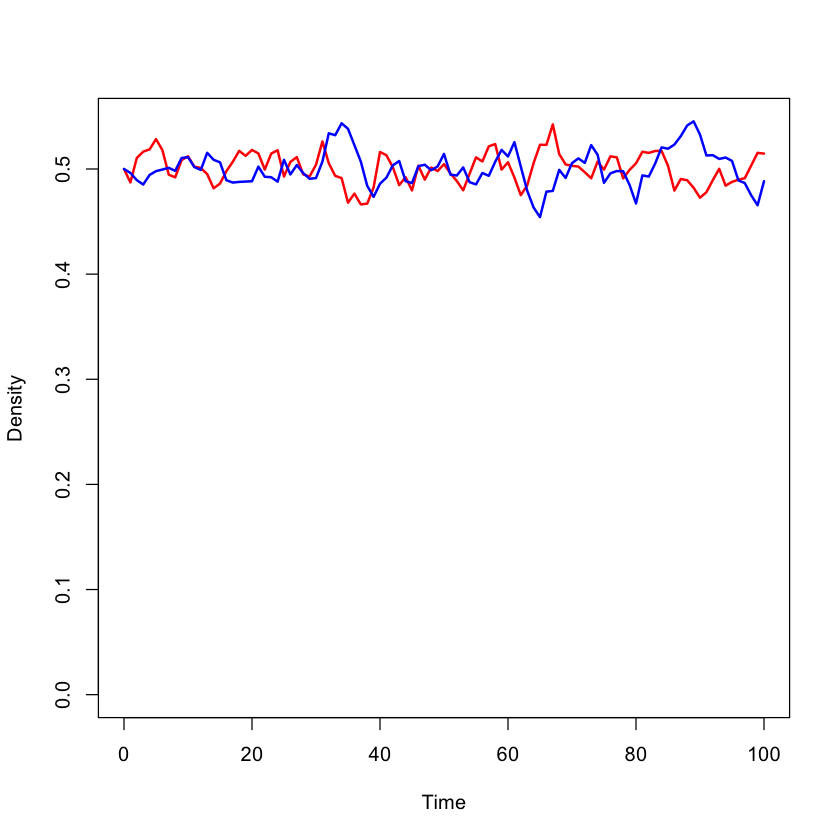

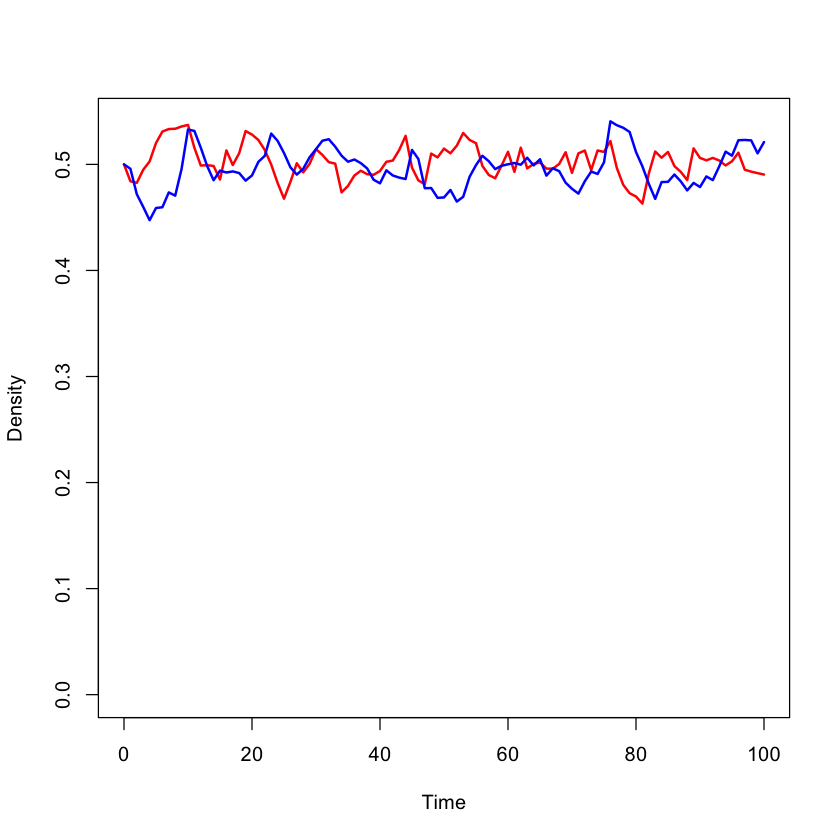

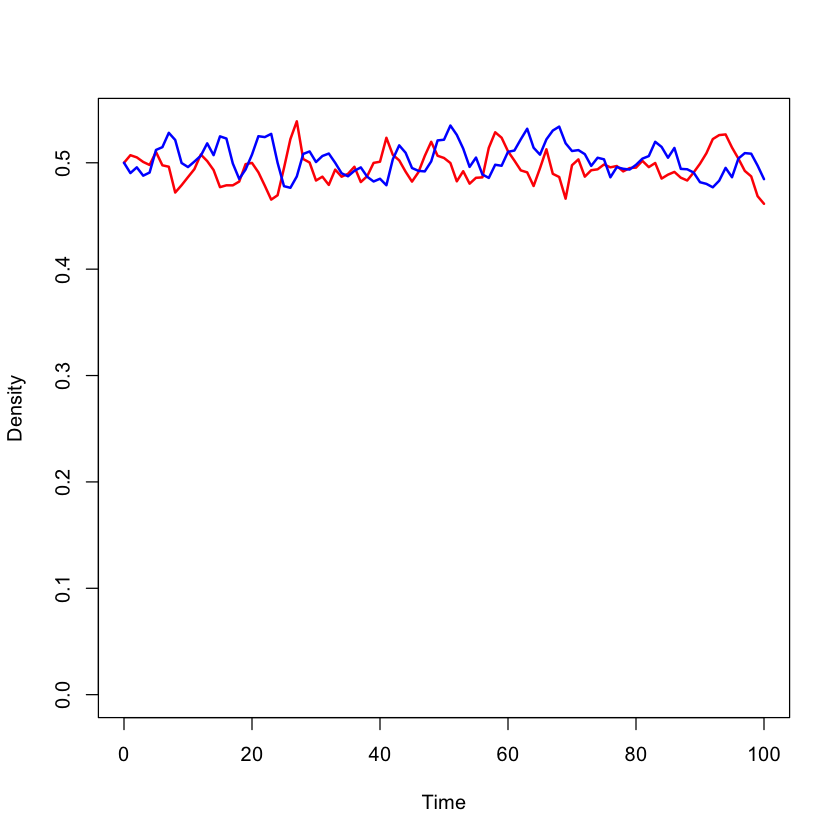

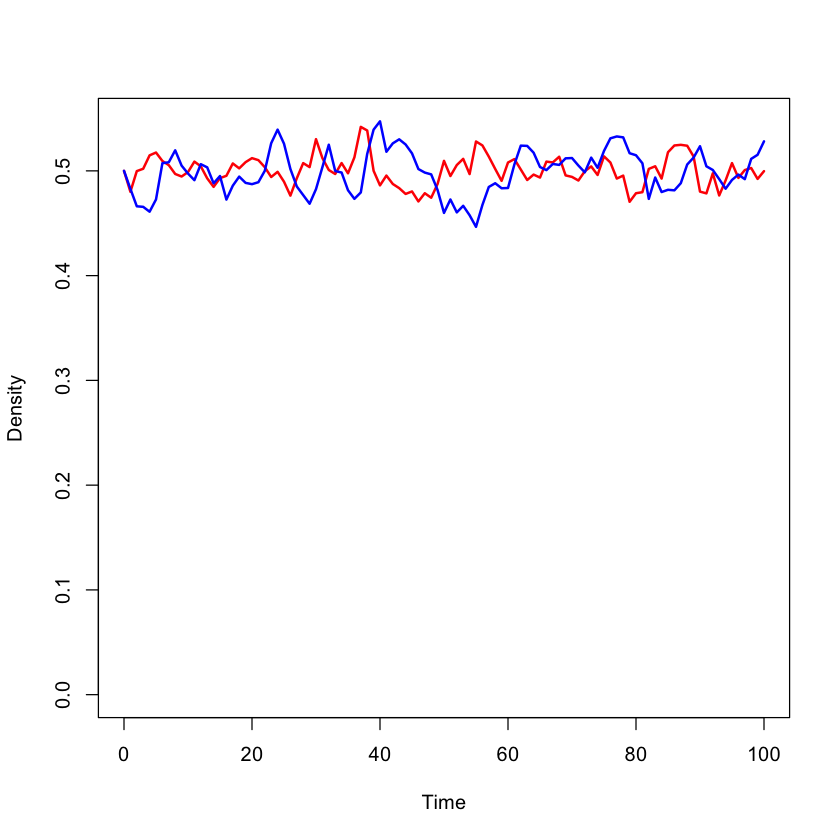

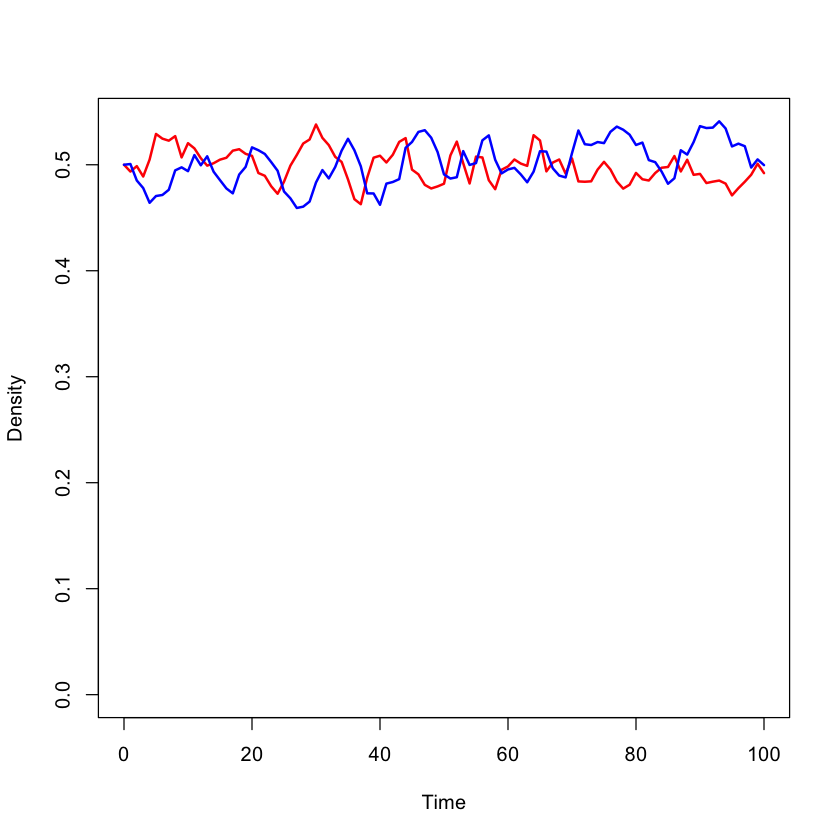

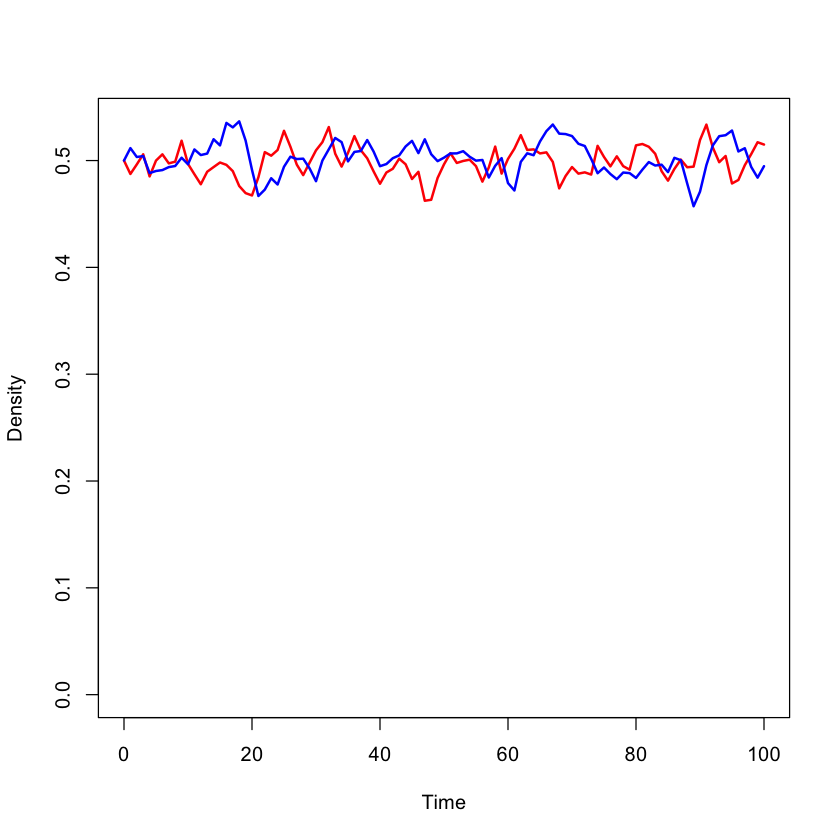

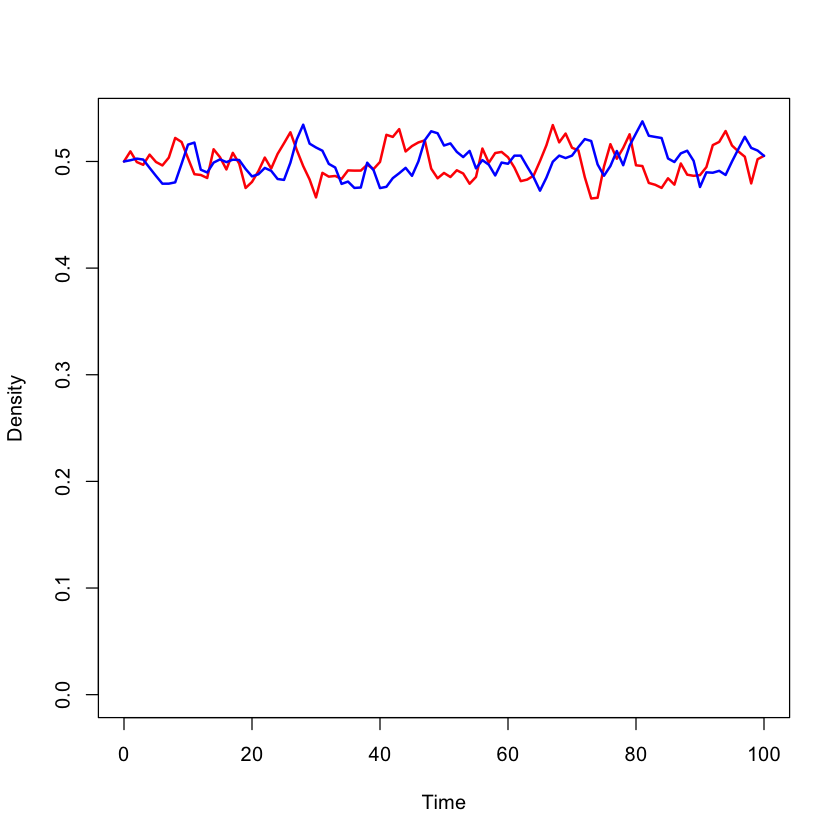

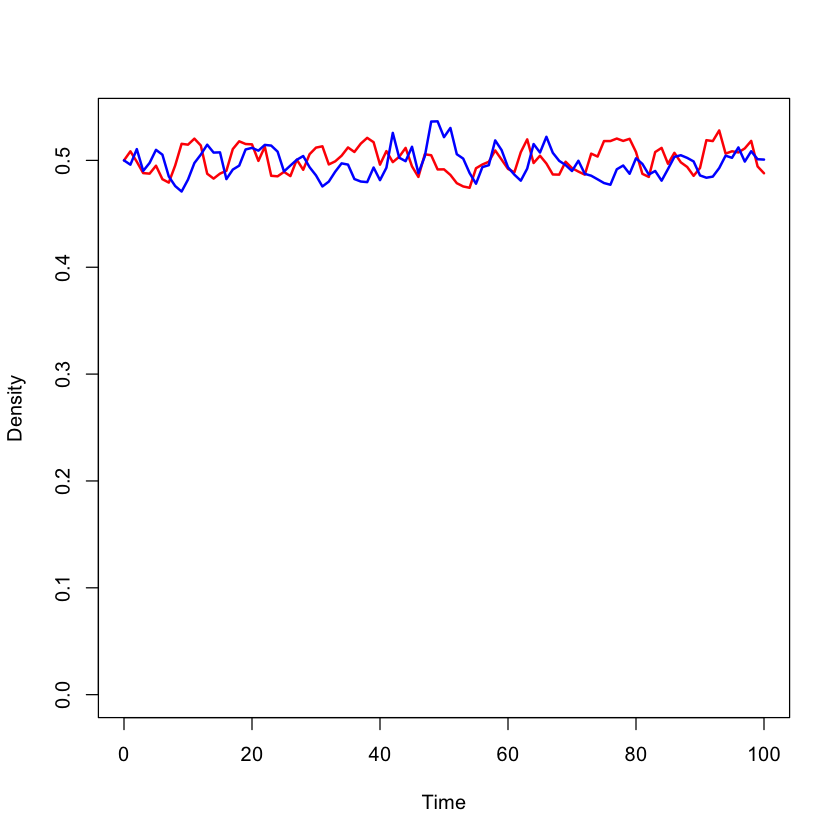

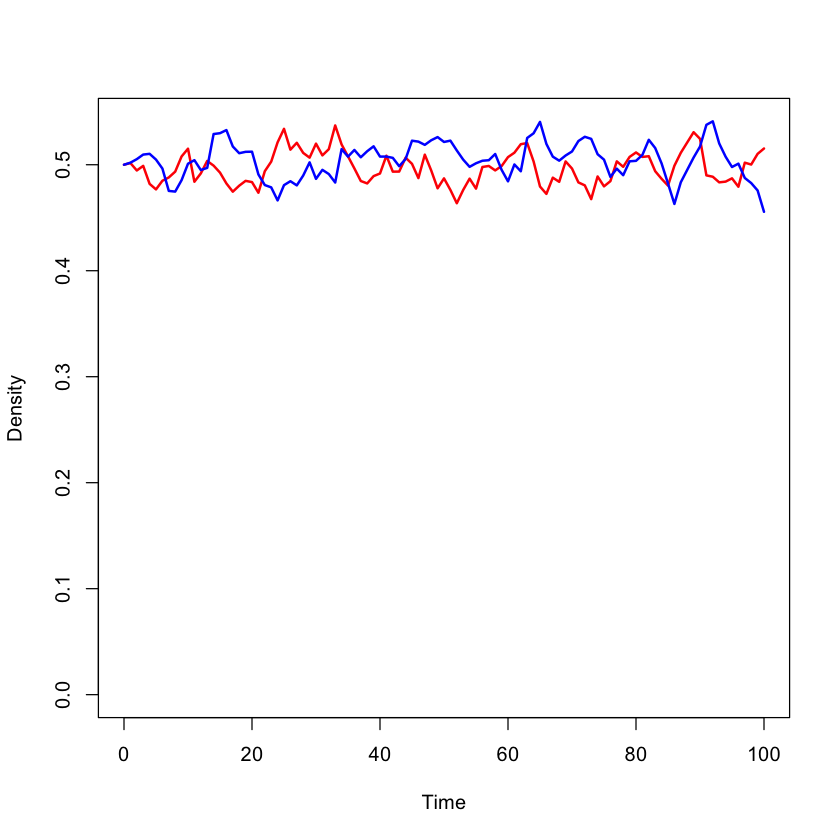

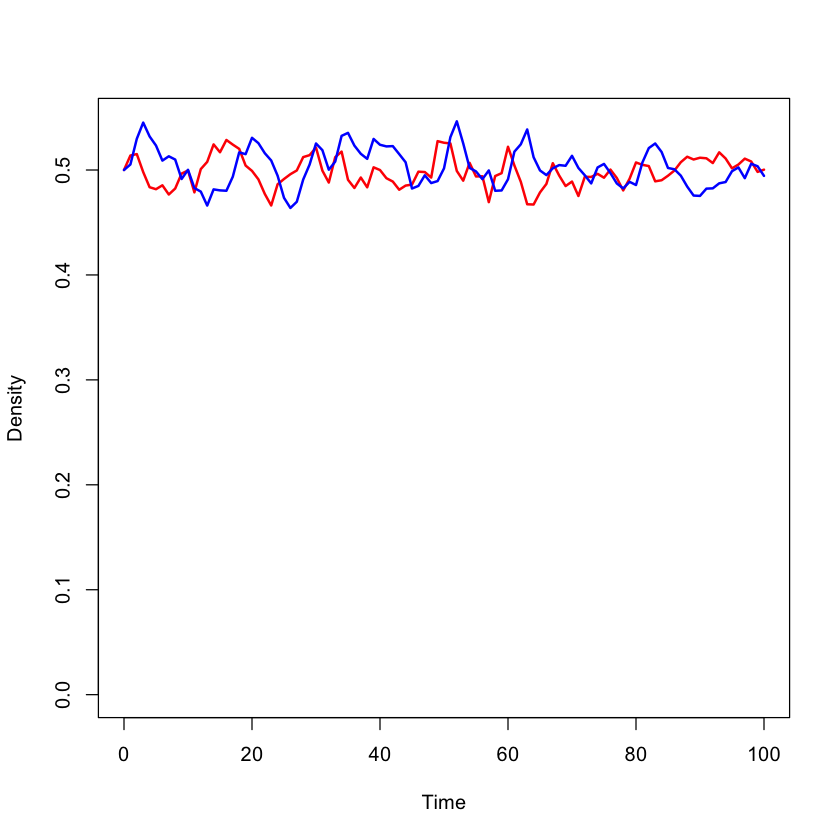

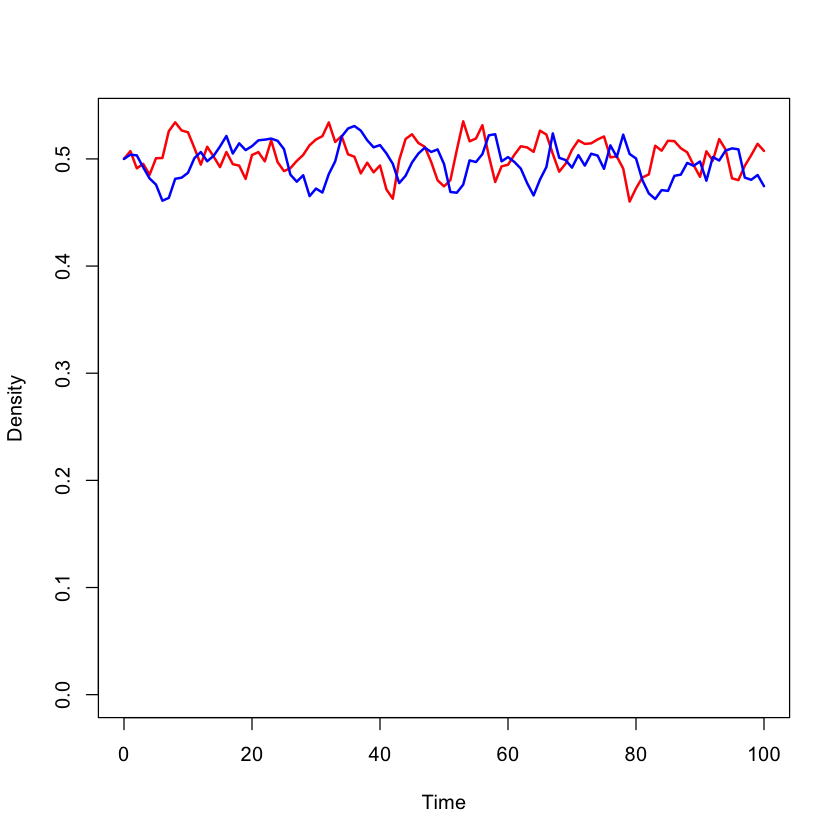

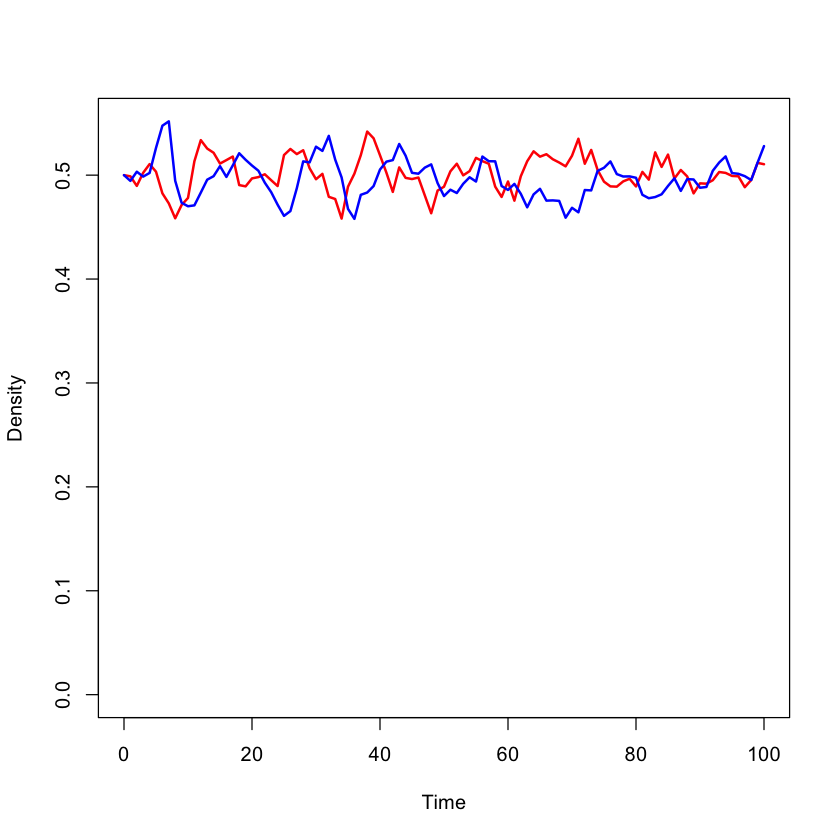

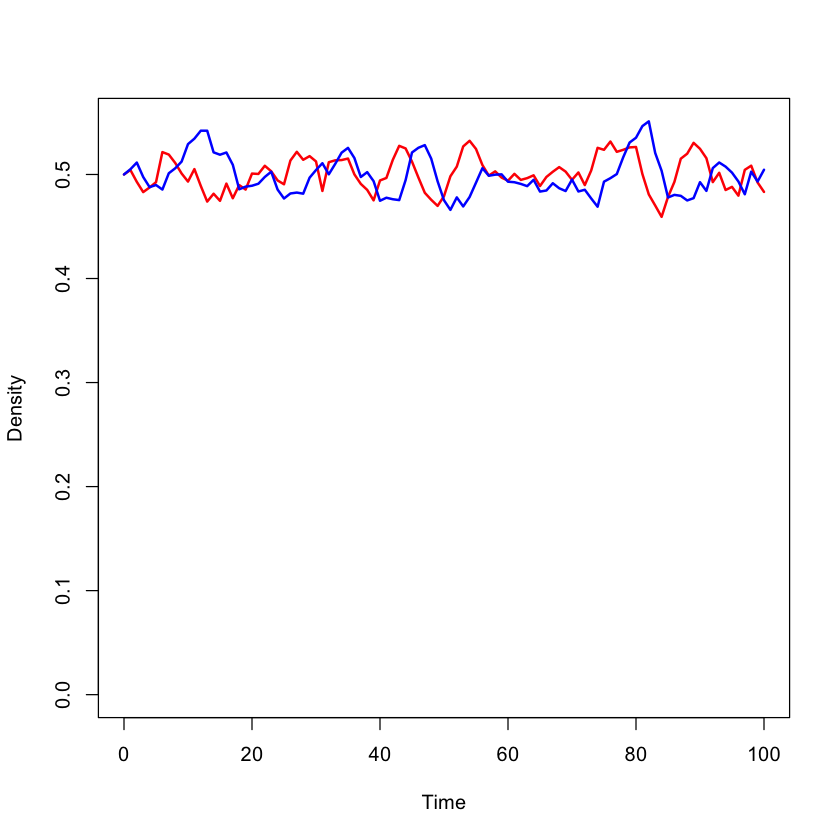

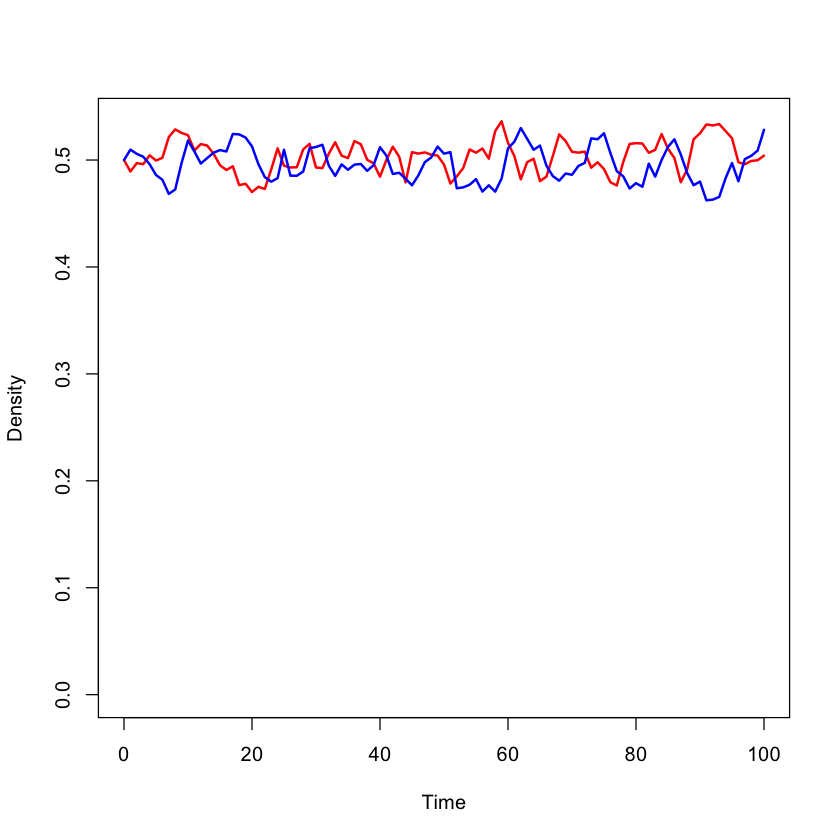

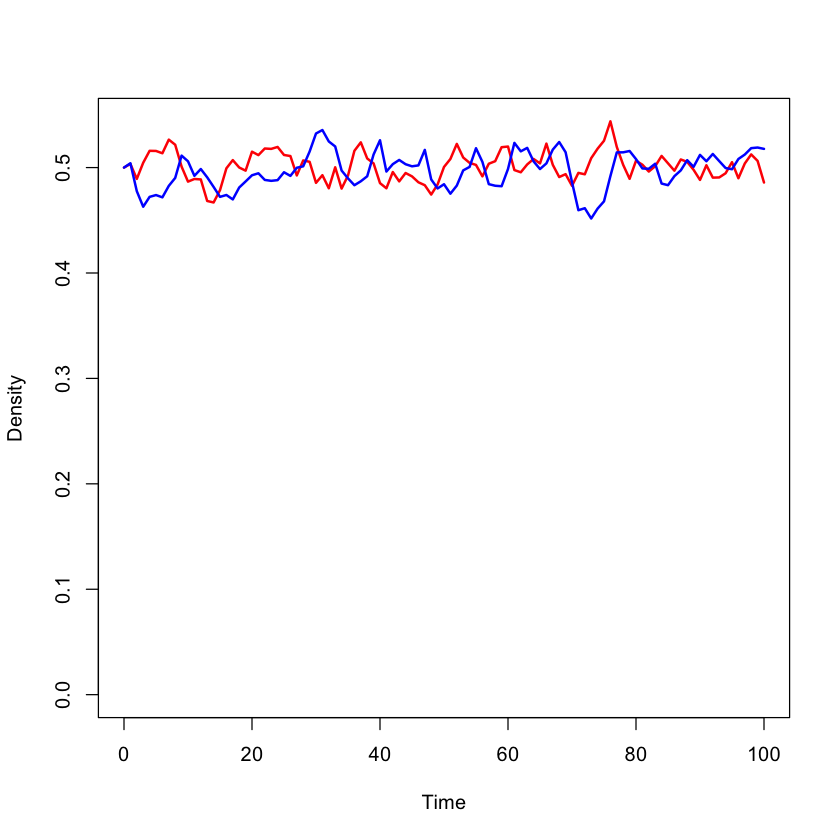

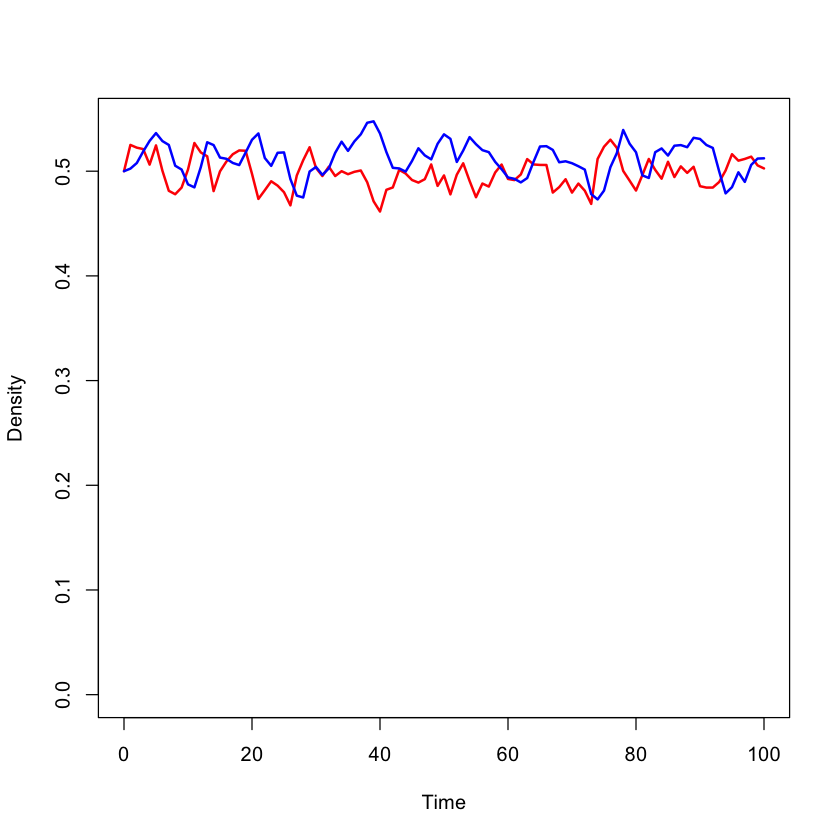

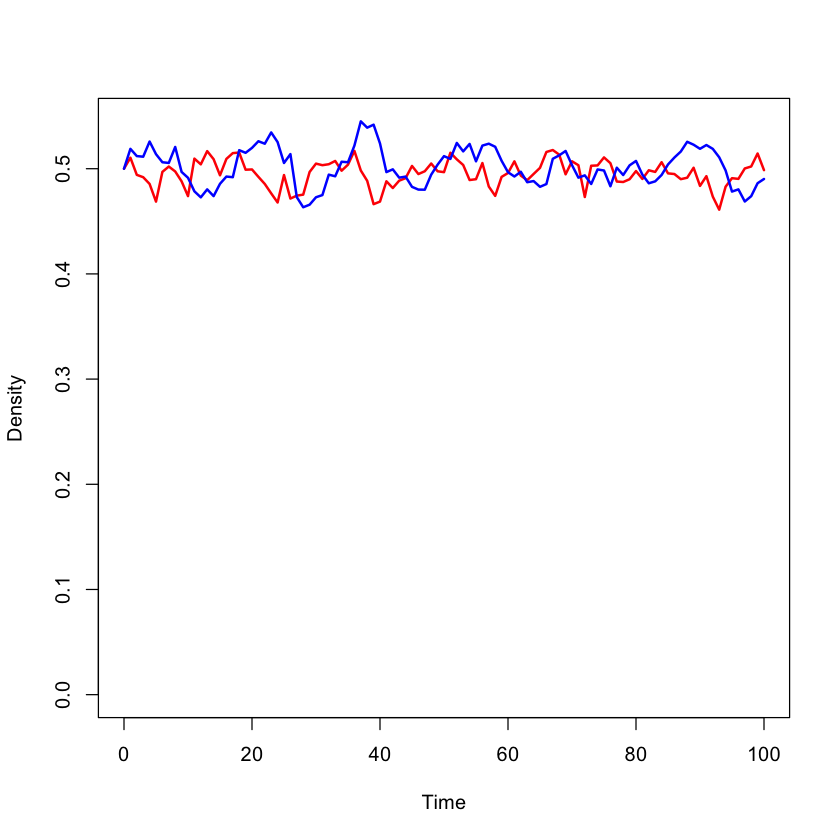

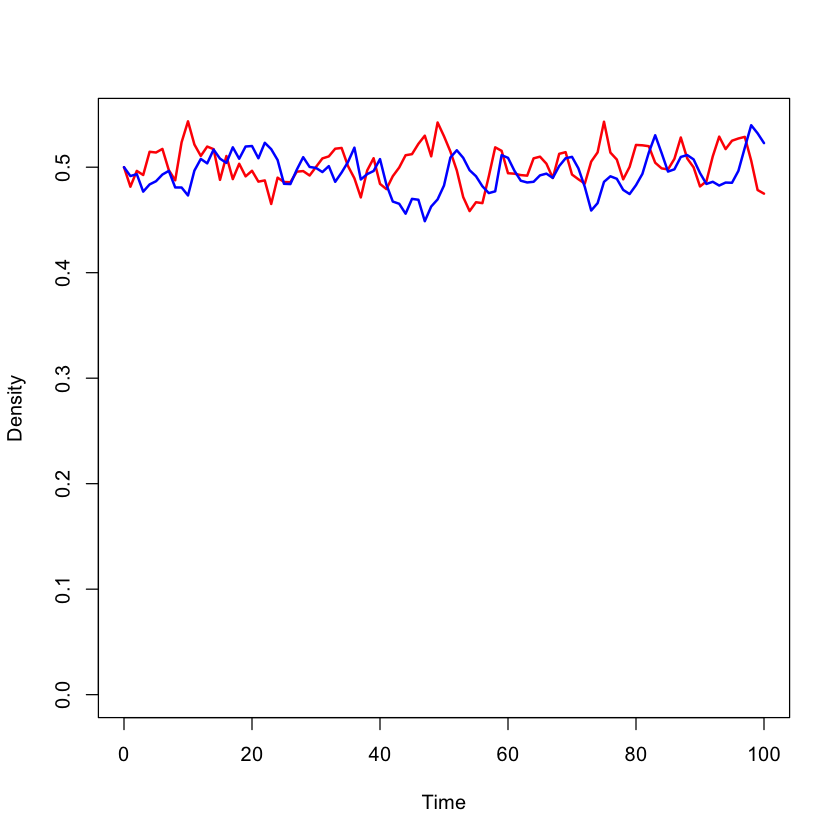

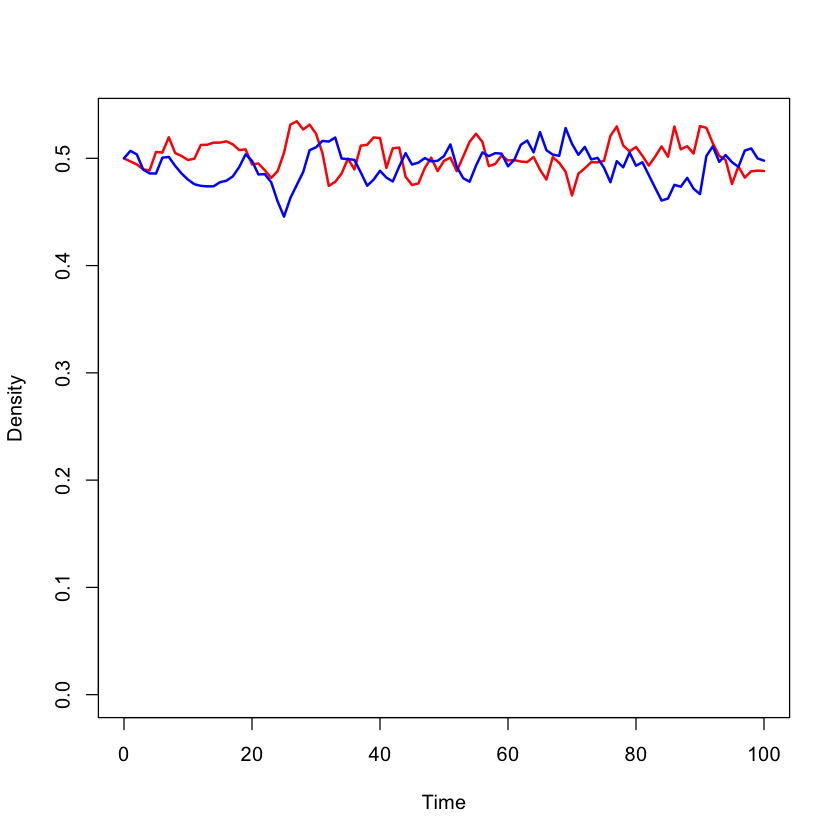

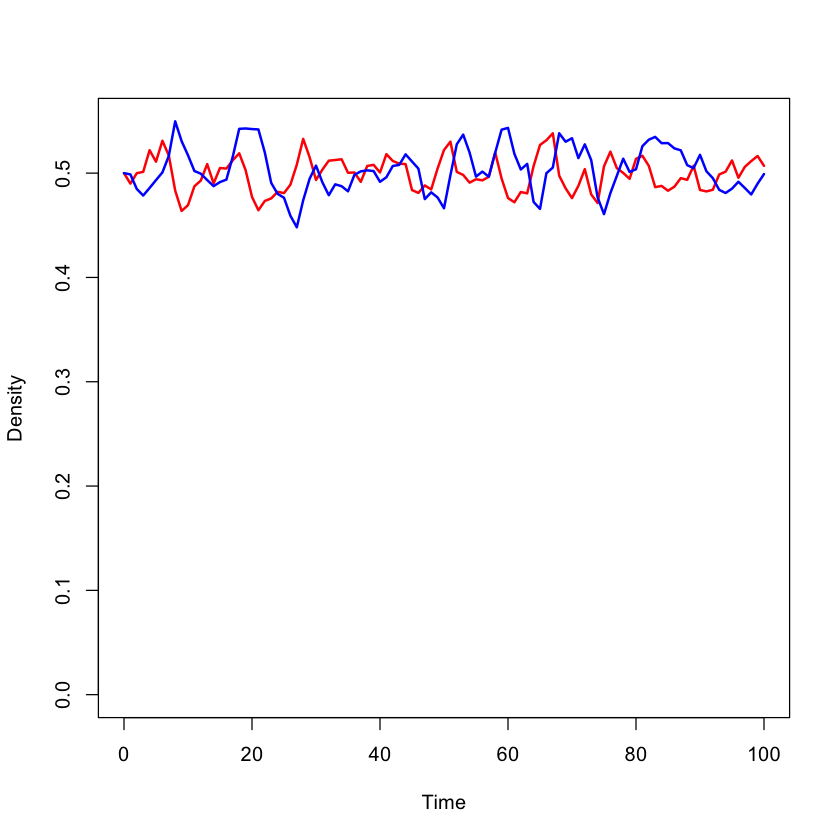

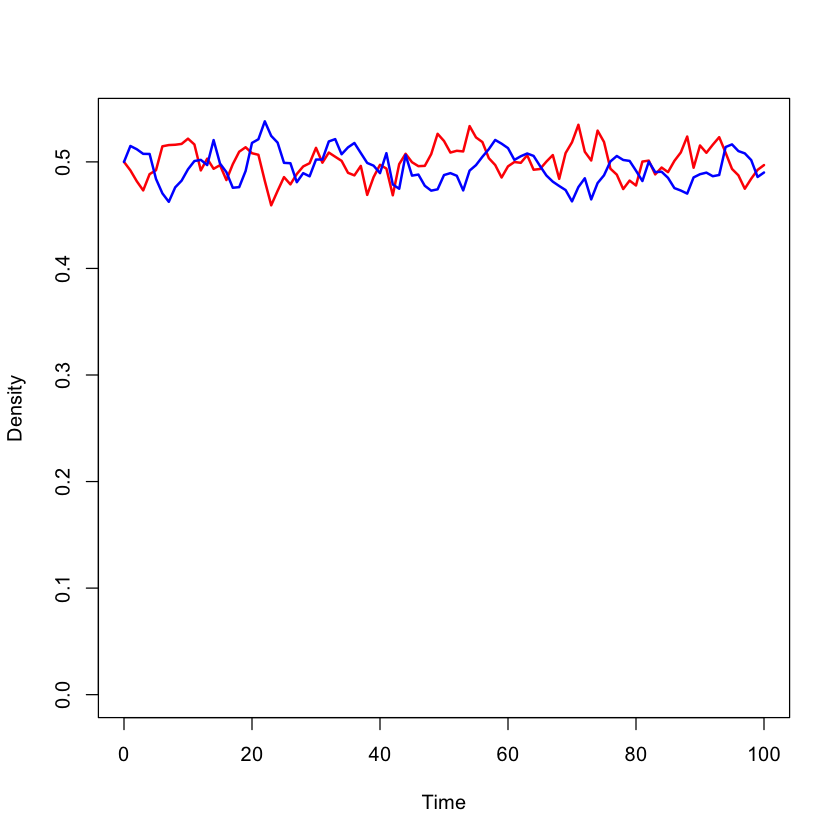

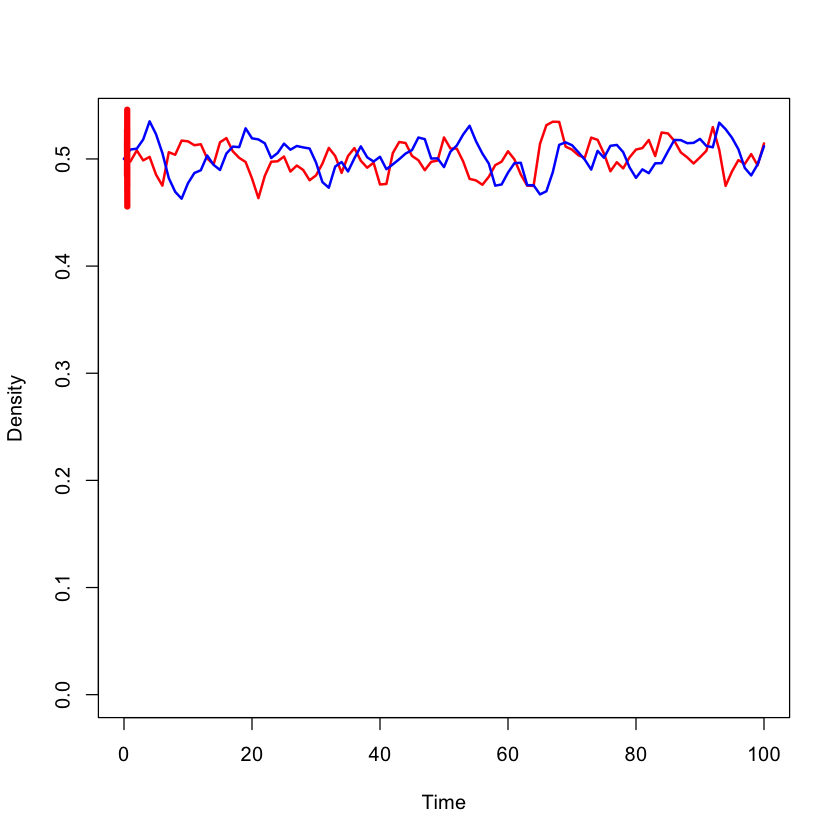

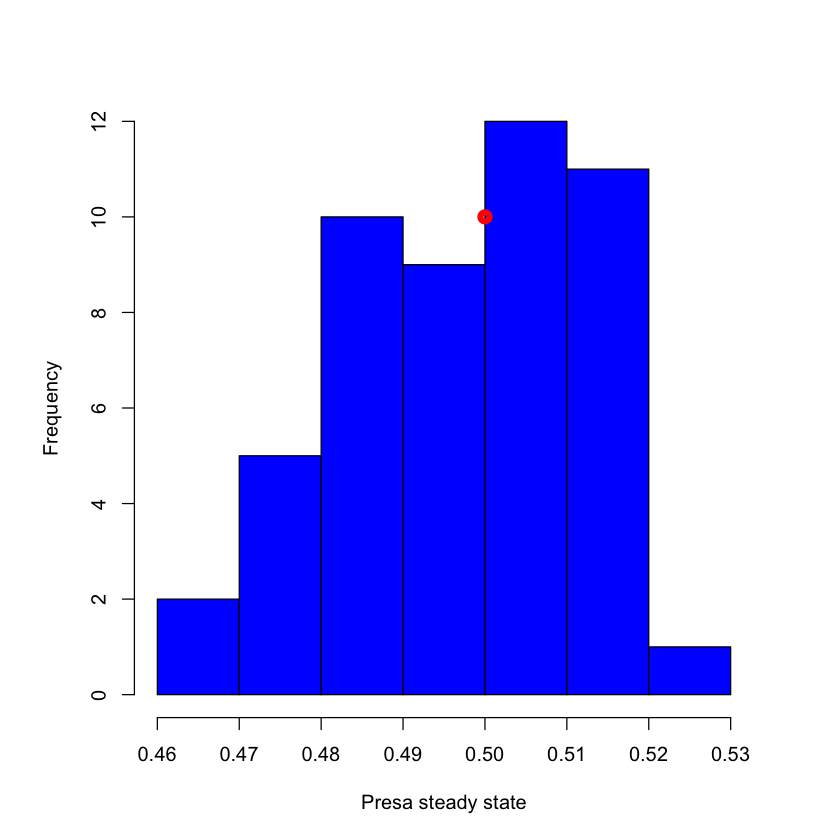

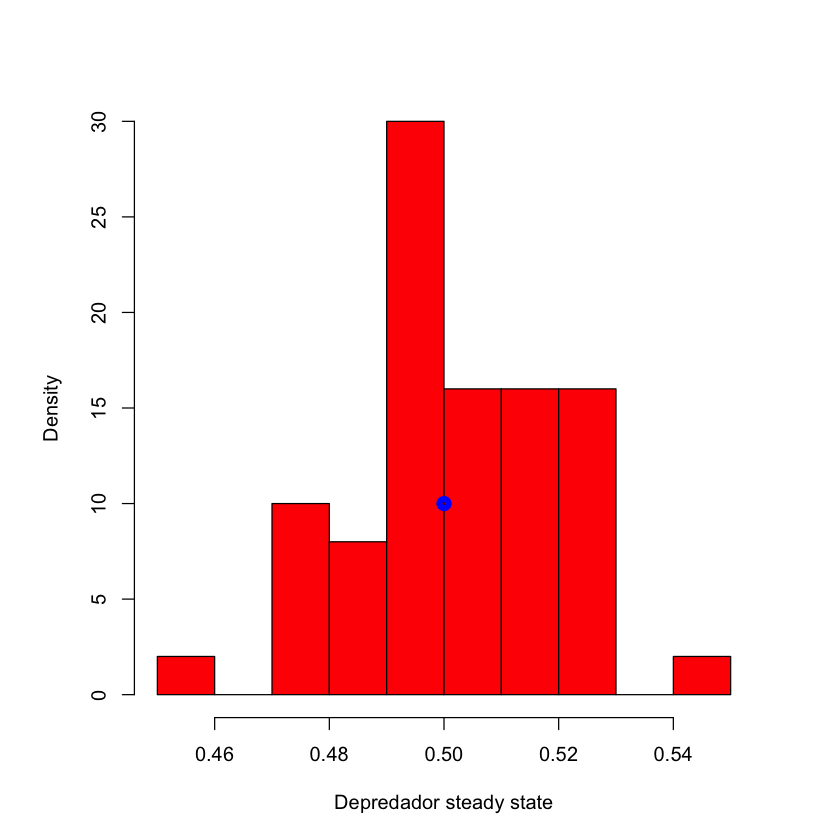

In [14]:
# ---------------------------------------------------------------------------------
# Ejemplo de modelo depredador-presa con ruido aditivo usando Grind.R
# ---------------------------------------------------------------------------------
# En este script:
# 1. Definimos un modelo sencillo de depredador-presa con crecimiento logístico de la presa.
# 2. Calculamos un estado de equilibrio aproximado.
# 3. Iteramos varias veces partiendo de ese equilibrio y añadimos un ruido gaussiano a cada variable en cada paso.
# 4. Al finalizar, graficamos la trayectoria (R vs. N) y las distribuciones de valores finales de R y N.
# ---------------------------------------------------------------------------------

# Muestra el directorio de trabajo actual (opcional)
getwd()

# Carga el archivo Grind.R (asegúrate de que esté en el mismo directorio o especifica la ruta)
source('Grind.R')

# Definición del modelo depredador-presa
# R = población de presas
# N = población de depredadores
# Parámetros:
#   r     = tasa de crecimiento intrínseco de la presa
#   K     = capacidad de carga de la presa
#   a     = tasa de encuentro depredador-presa
#   c     = eficiencia de conversión (qué tan bien el depredador convierte la presa en crecimiento)
#   delta = tasa de mortalidad del depredador
model <- function(t, state, parms) {
  with(as.list(c(state, parms)), {
    # Ecuación diferencial para la presa:
    # dR/dt = r*R*(1 - R/K) - a*R*N
    #    (crecimiento logístico menos la pérdida por depredación)
    dR <- r * R * (1 - R / K) - a * R * N
    
    # Ecuación diferencial para el depredador:
    # dN/dt = c*a*R*N - delta*N
    #    (ganancia a partir de la depredación menos la mortalidad natural)
    dN <- c * a * R * N - delta * N
    
    return(list(c(dR, dN)))
  })
}

# Vector de parámetros del modelo (valores por defecto)
p <- c(r = 1, K = 1, a = 1, c = 1, delta = 0.5)

# Estado inicial (presa y depredador)
s <- c(R = 1, N = 0.01)

# ---------------------------------------------------------------------------------
# Cálculo de un estado de equilibrio aproximado
# ---------------------------------------------------------------------------------
# La función newton() intenta encontrar un punto donde las derivadas sean 0.
f <- newton(c(R = 0.5, N = 0.5))

# Ejemplo de ejecución del modelo desde el estado de equilibrio, con ruido:
# "state <- state + rnorm(2, mean=0, sd=0.01)" indica que, tras cada paso,
# se añaden dos valores aleatorios (uno para R y otro para N) con media 0 y desviación estándar 0.01.
X <- run(state = f,
         after = "state<-state+rnorm(2, mean=0, sd=0.01)",
         legend = FALSE)  # legend=FALSE evita mostrar la leyenda en la gráfica

# Definimos el número de iteraciones que se realizarán
iterations <- 50

# ---------------------------------------------------------------------------------
# Preasignación de la matriz para guardar resultados
# ---------------------------------------------------------------------------------
# x_t_family tendrá tantas filas como iteraciones y 2 columnas (una para R y otra para N).
x_t_family <- matrix(data = NA, nrow = iterations, ncol = 2)

# Bucle de iteraciones:
# 1. Integra el modelo partiendo del estado de equilibrio
# 2. Añade el ruido gaussiano
# 3. Guarda el nuevo estado en x_t_family
for (i in 1:iterations) {
  X <- run(state = f,
           after = "state<-state+rnorm(2, mean=0, sd=0.01)",
           legend = FALSE)
  x_t_family[i, ] <- X
}

# ---------------------------------------------------------------------------------
# Gráfica de la trayectoria de (R, N) a lo largo de las iteraciones
# ---------------------------------------------------------------------------------
# Se traza una línea que muestra cómo evolucionan las variables R y N con el ruido.
lines(x_t_family[, 1], x_t_family[, 2],
      col = "red",
      type = "l",
      lwd = 5,
      ylab = "cocos",    # Etiqueta del eje y (puedes cambiarla si deseas)
      xlab = "time")     # Etiqueta del eje x (puedes cambiarla si deseas)

# ---------------------------------------------------------------------------------
# Histograma de valores finales de R (presa)
# ---------------------------------------------------------------------------------
par(pty = "s")  # Ajusta la relación de aspecto a cuadrada
hist(x_t_family[, 1],
     freq = TRUE,
     col = "blue",
     main = " ",
     xlab = "Presa steady state")

# Añade un punto en la posición del equilibrio de R
points(f[1], 10, col = "red", lwd = 5)

# ---------------------------------------------------------------------------------
# Histograma de valores finales de N (depredador)
# ---------------------------------------------------------------------------------
par(pty = "s")
hist(x_t_family[, 2],
     probability = TRUE,
     col = "red",
     main = " ",
     xlab = "Depredador steady state")

# Añade un punto en la posición del equilibrio de N
points(f[2], 10, col = "blue", lwd = 5)
